<a href="https://colab.research.google.com/github/yaraaldos/Diabetes-risk-prediction/blob/main/Reports/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phase 3 (Final Report)**

# **[1] Problem**



This project introduces the problem of understanding and predicting diabetes risk using real patient data. The main objective is to solve the challenge of determining whether an individual is diabetic, non-diabetic, or potentially at risk by analyzing features such as age, gender, BMI, creatinine level, and other medical symptoms included in the dataset. This problem is important because early identification of diabetes risk enables timely medical intervention, reduces the chance of complications, and improves overall patient health outcomes. In addition to classification, the project also aims to explore hidden patterns through clustering and generate predictions that support more informed and effective early detection strategies.



--------------------------------------------------------------------------------

# **[2] Data Mining Task**



To address the problem defined in Phase 1, the project is formalized as a data mining task that relies on two main techniques: classification and clustering. These techniques help in understanding patient characteristics, identifying risk groups, and predicting diabetes-related outcomes.

**The tasks are defined as follows:**

1. **Classification:**
   Build a predictive model that assigns each individual to one of several categories (diabetic, non-diabetic, or at-risk) based on medical features such as age, gender, BMI, and creatinine level. This supports direct decision-making and early identification of potential diabetes cases.

2. **Clustering:**
   Group patients with similar health profiles to discover hidden patterns within the dataset. This helps reveal natural groupings or risk patterns that may not be visible through basic analysis, providing deeper insight into patient characteristics.

Through these two tasks, the project aims to better understand the dataset, detect potential risks earlier, and support more effective healthcare decisions.


-------------------------------------------------------------------------------

# **[3] Data**



The selected dataset consists of **1,000 patient records** and includes **14 attributes** that provide a comprehensive view of demographic factors, physical measurements, and biochemical indicators commonly associated with diabetes development. The structure of the dataset makes it highly suitable for both supervised and unsupervised data mining tasks.

The dataset begins with two identifying fields, **ID** and **No_Pation**, which uniquely differentiate patients but do not carry medical or predictive meaning. Demographic variables include **Gender** and **AGE**, offering essential context because diabetes prevalence and risk often vary across gender and age groups. Physical health is represented through **BMI**, a major risk factor noted in clinical literature due to its strong relationship with obesity and metabolic disorders.

The majority of the dataset consists of biochemical laboratory measurements, each reflecting a different aspect of metabolic and renal health. These include:

* **Urea** and **Creatinine (Cr)**, which provide insight into kidney function.
* **HbA1c**, a key clinical marker used to evaluate blood glucose levels over time.
* **Cholesterol**, **LDL**, **HDL**, **VLDL**, and **Triglycerides (TG)**, which together form the lipid profile and help identify metabolic imbalances linked to diabetes and cardiovascular complications.

The final column, **CLASS**, assigns each patient to one of three categories: diabetic (P), non-diabetic (N), or potentially at risk. This label supports classification tasks and provides a clear target for predictive modeling.

During the exploration of the raw dataset in Phase 2, several characteristics became noticeable. Some attributes showed repeated values or patterns that suggested that certain medical measurements may be common across multiple patients. Several numerical columns displayed wide variation in their scales, reflecting the natural differences in units and medical ranges (for example, HbA1c vs. triglycerides). Additionally, some attributes appeared to behave more like identifiers than useful predictors, while categorical fields required standardization for proper model handling. These observations highlighted that the dataset, although rich and structured, would benefit from cleaning and preparation before applying data mining algorithms.

Overall, the dataset provides a solid foundation for analyzing diabetes risk. Its combination of demographic information, physical metrics, and laboratory results allows for meaningful classification, clustering, and pattern discovery.



--------------------------------------------------------------------------------

# **[4] Data Preprocessing**

--------------------------------------------------------------------------------

**Part 1: Data Analysis**


In this part, we start by loading the dataset from our GitHub repository and visualizing the basic distributions of the categorical variables **Gender** and **CLASS**. These plots help us understand the balance of the data before preprocessing.


**Uploading data and viewing some samples :**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

url = "https://raw.githubusercontent.com/yaraaldos/Diabetes-risk-prediction/refs/heads/main/Dataset/Raw_data.csv"
df = pd.read_csv(url) # to upload and read data
df_copy= df.copy() # the one used for for data of cleaning (preprocessed)

print("Loaded shape:", df.shape) # to show the number of columns and rows
print("\nHead:")
print(df.head()) # shows a sample of 5 rows of all coulmns (This step i put to ensure the data loaded correctly)

Loaded shape: (1000, 14)

Head:
    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


**1.1 Five number summery :**

In [ ]:
# Show statistical summary (describe) as a formatted table
ignore_cols = ["ID", "No_Pation"]

summary = df.drop(columns=ignore_cols, errors="ignore").describe()
summary

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


After removing the ID and No_Pationt columns, which were only identifiers, the dataset includes meaningful medical features for 1000 patients. By applying df.describe(), the summary shows that all attributes have complete records (count = 1000) and varying distributions. AGE ranges from 20 to 80 with a moderate spread, indicating most patients are middle-aged. Urea and Creatinine (Cr) show noticeable variation and a few high values, reflecting differences in kidney function. HbA1c has a high average with wide dispersion, suggesting many patients have elevated blood sugar levels. The lipid profile (Chol, TG, HDL, LDL, and VLDL) presents moderate means but high standard deviations, showing that some individuals have borderline or abnormal cholesterol and triglyceride levels. Finally, BMI values range from 19 to 43 with an average around 30, indicating that most patients are overweight or obese. Overall, the statistical summary highlights a population with diverse health conditions, where several attributes show signs of metabolic risk related to diabetes and obesity.

**1.1 calculate the variance :**

In [ ]:
cols = ['AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
df[cols].var()

,0
AGE,77.426643
Urea,8.615196
Cr,3598.169921
HbA1c,6.421172
Chol,1.694521
TG,1.963294
HDL,0.436146
LDL,1.243452
VLDL,13.421960
BMI,24.625296


This code calculates the variance for all numeric attributes in the dataset. The results show how much each variable deviates from its mean value. Some columns like ID or No_Pation have very large variances because they are identifiers, while attributes such as AGE, Chol, and BMI show realistic spread in their values.

**1.2 Graphs**

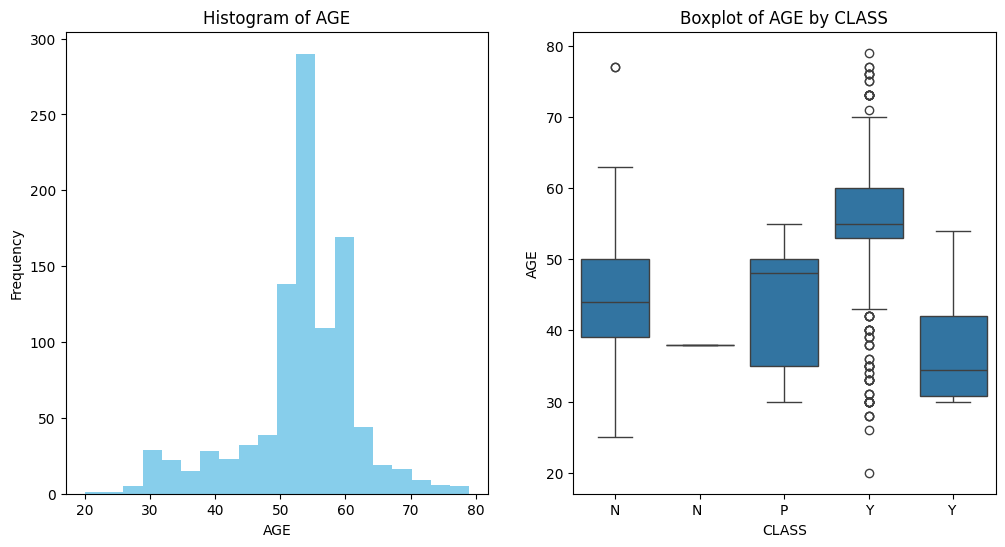

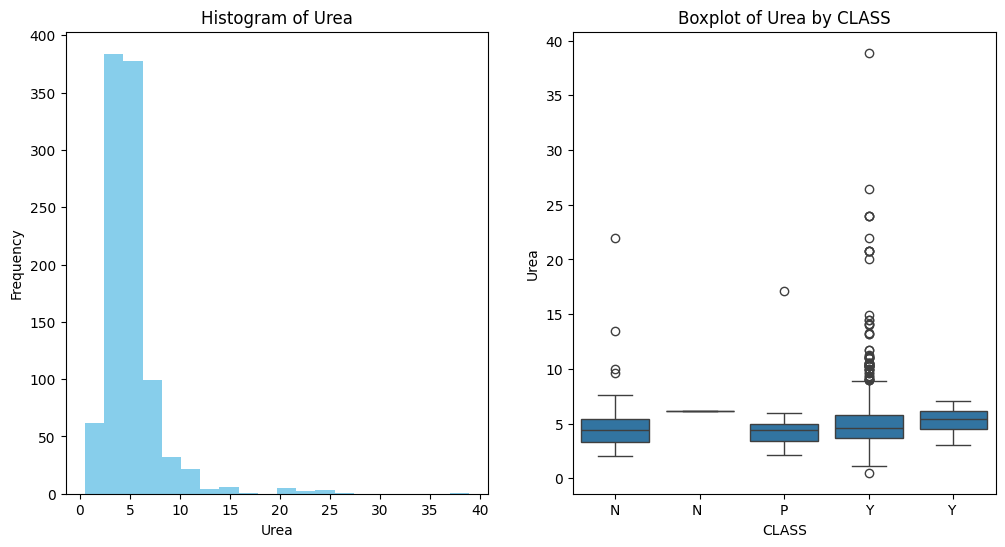

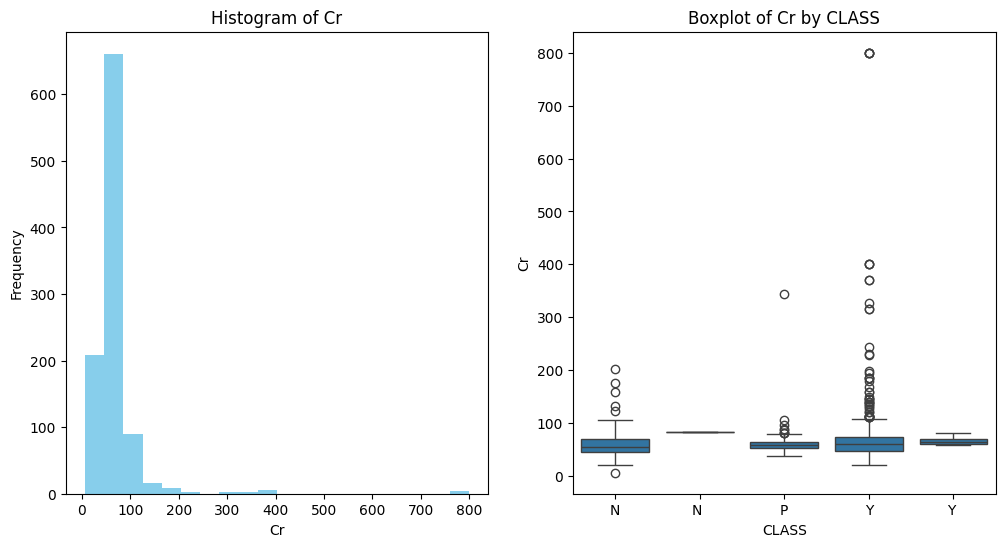

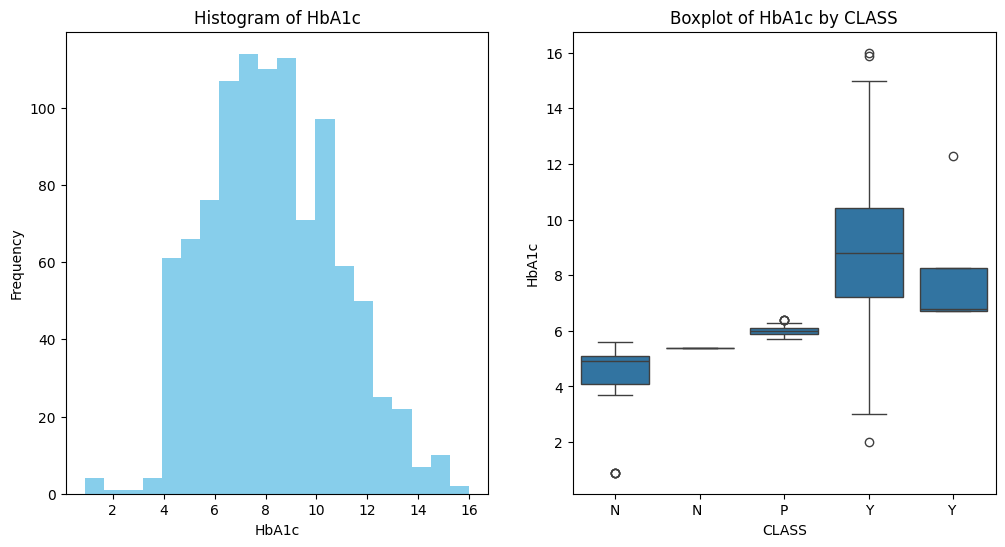

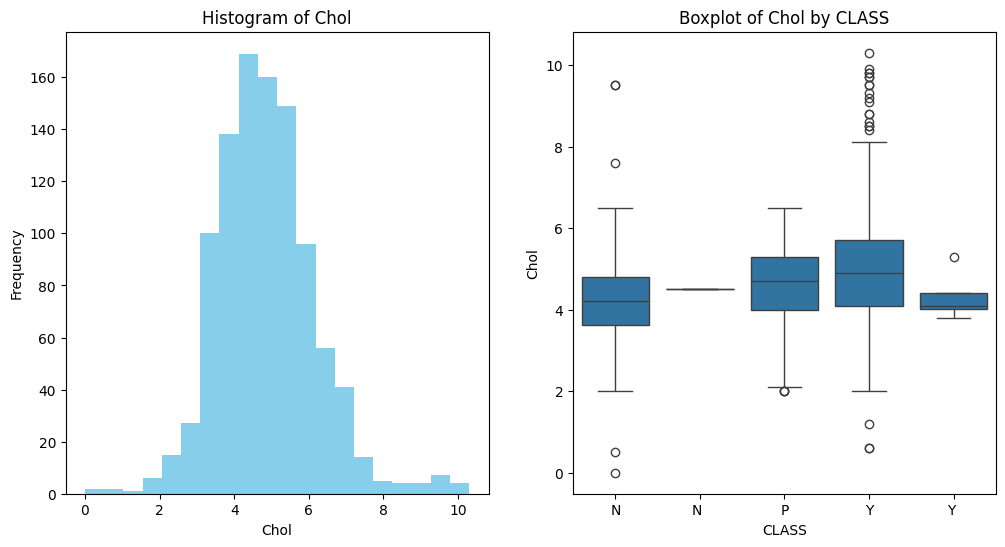

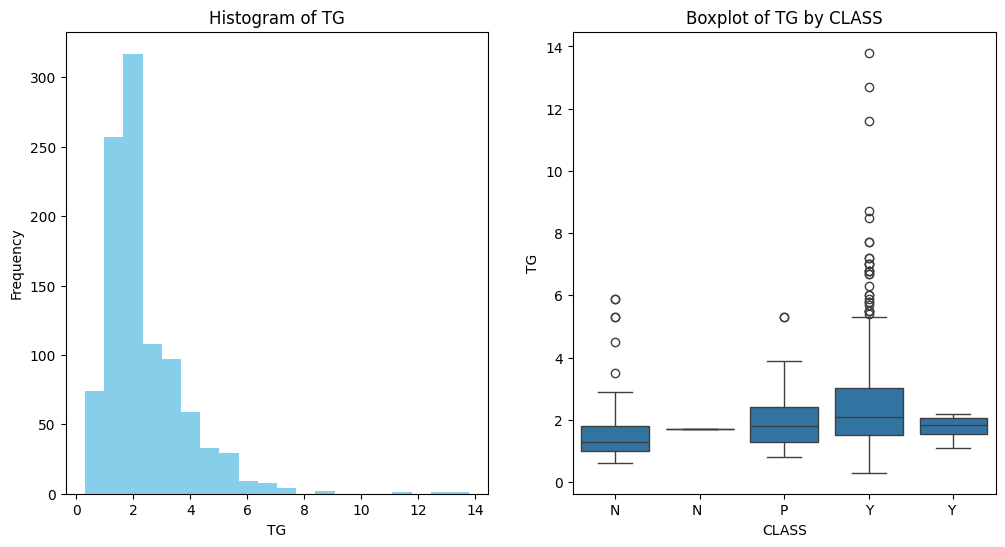

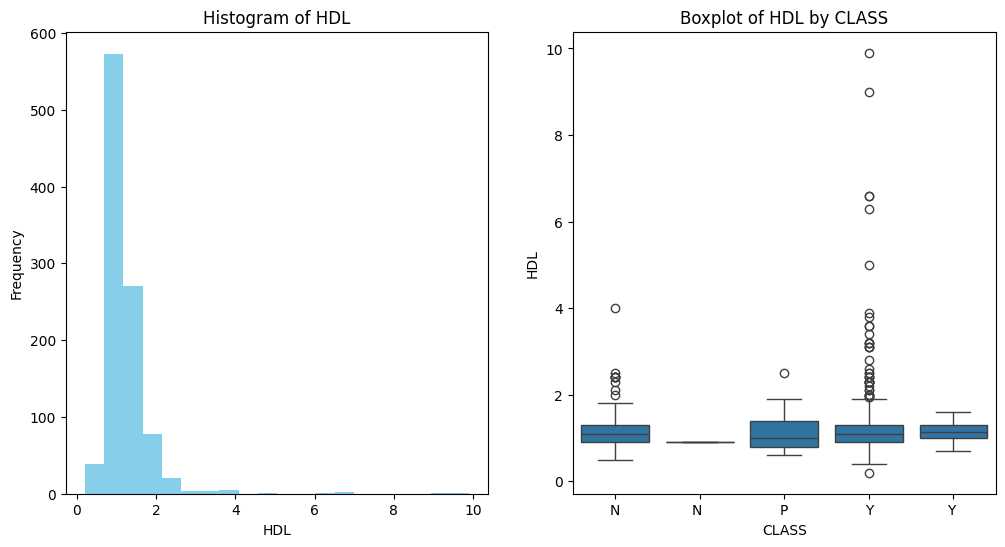

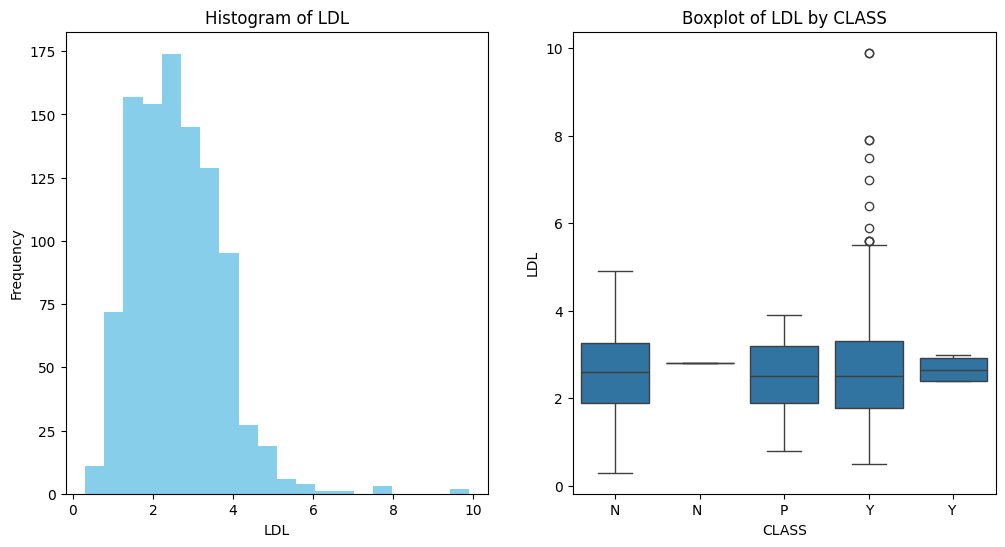

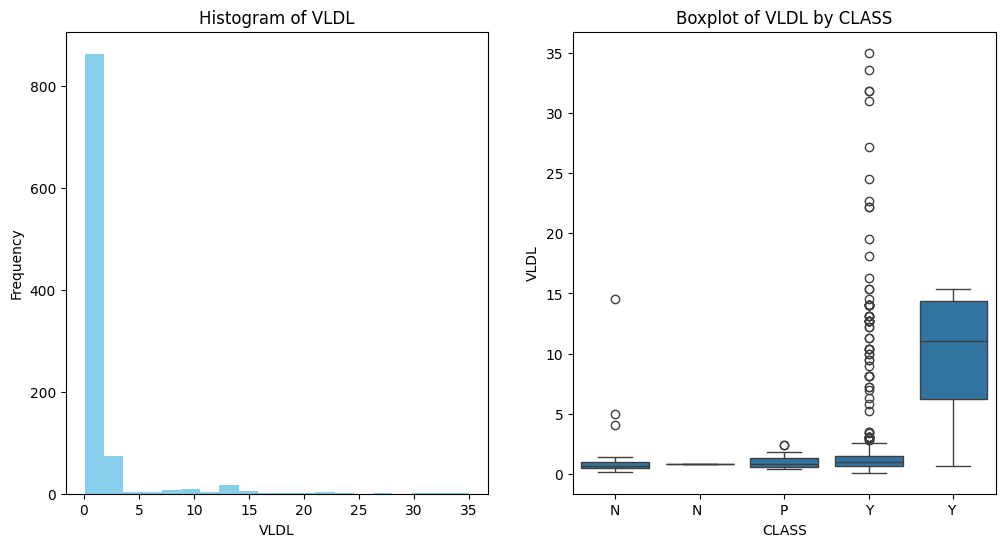

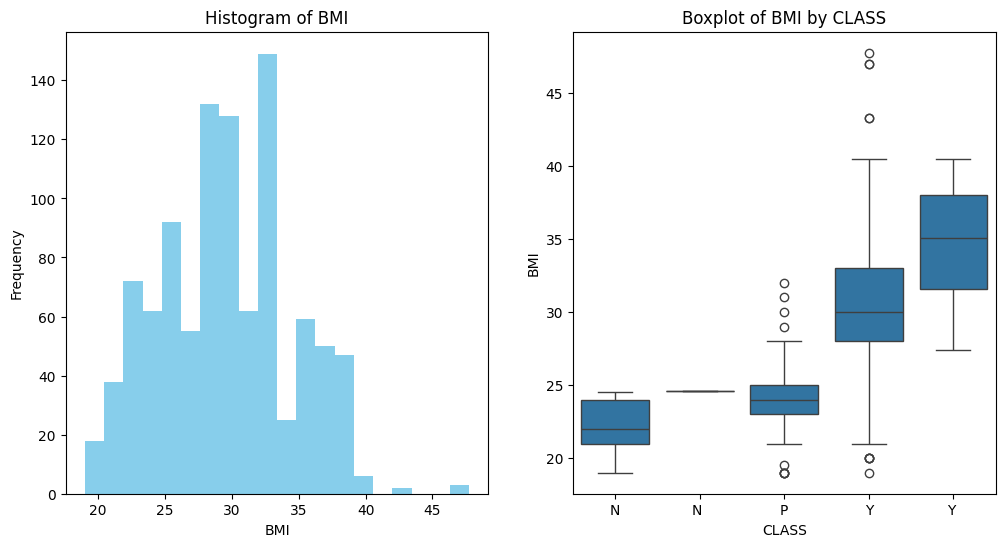

In [ ]:
import seaborn as sns


numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ["ID", "No_Pation"]]


for col in numeric_cols:
    vals = df[col].dropna()

    plt.figure(figsize=(12,6))

     #Histogram
    plt.subplot(1, 2, 1)
    plt.hist(vals, bins=20, color="skyblue")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

     # box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x="CLASS", y=col, data=df)
    plt.title(f"Boxplot of {col} by CLASS")
    plt.xlabel("CLASS")
    plt.ylabel(col)



plt.show()


**the reason of the problem**

In [ ]:
print(df["CLASS"].unique())

During this part , we noticed that some values were repeated in same letter because of the spaces in the data set This inconsistency will be cleaned to ensure uniform text formatting and accurate analysis, also some classes show a higher number than other need to take it in consideration in the preprocessing to be fair .

The attributes ID and No_Pation were excluded from the visualizations because they are only identifier fields. They do not provide any statistical or meaningful information about the patients or their diabetes condition. Therefore, only relevant numerical and categorical features were included in the graphs.

**after the cleaning the plt would be as :**

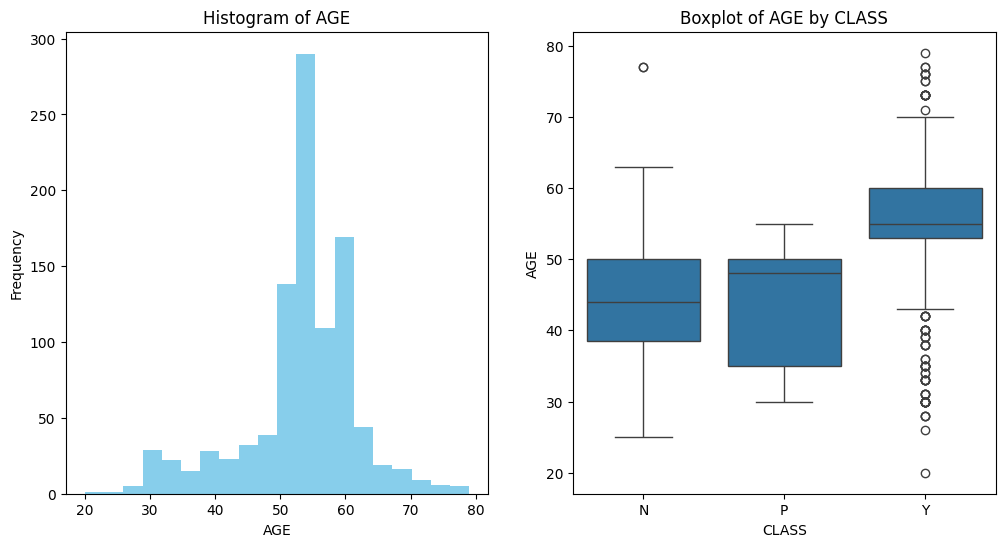

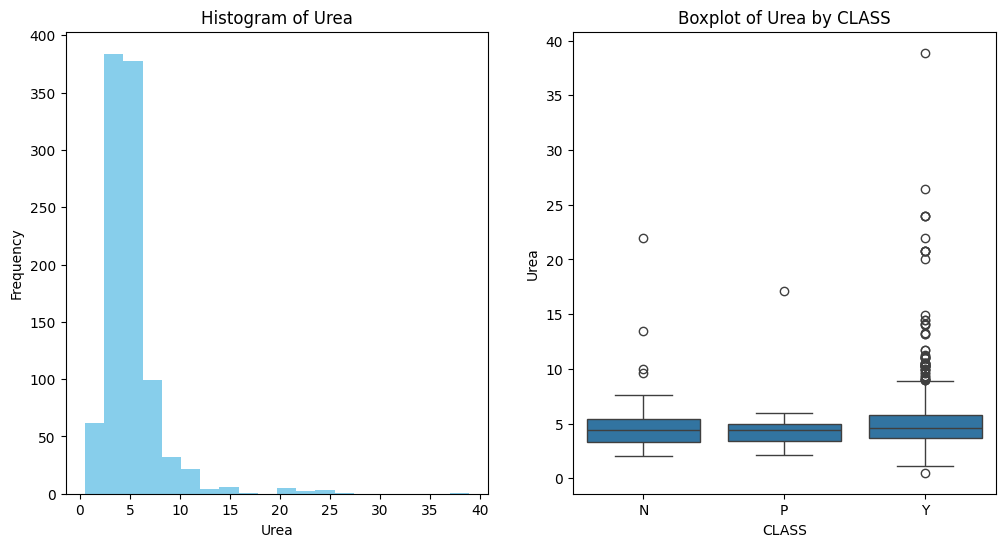

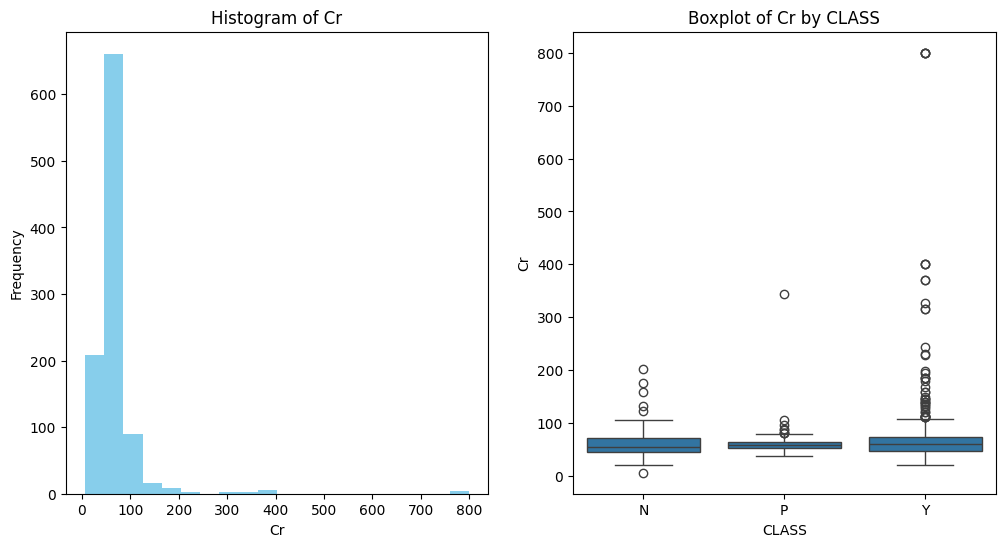

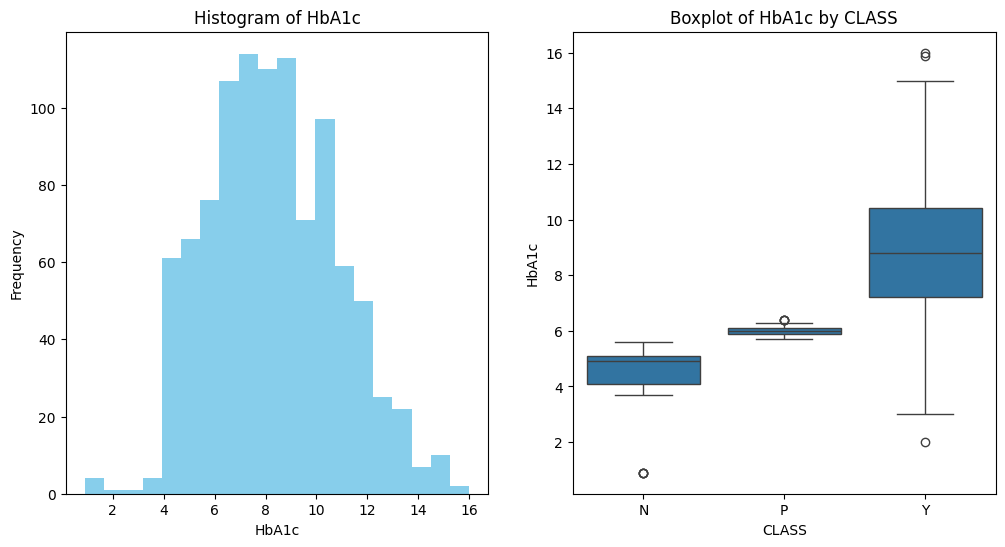

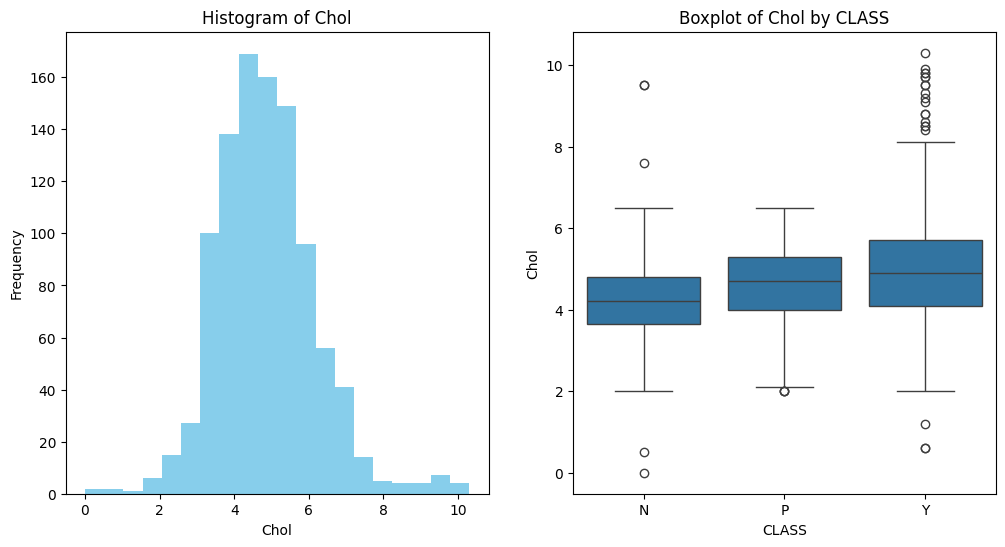

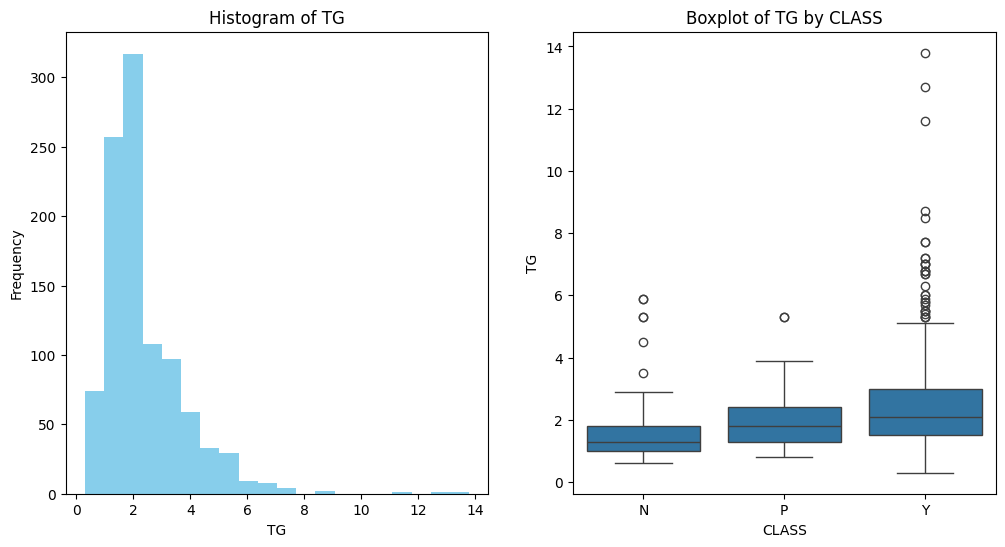

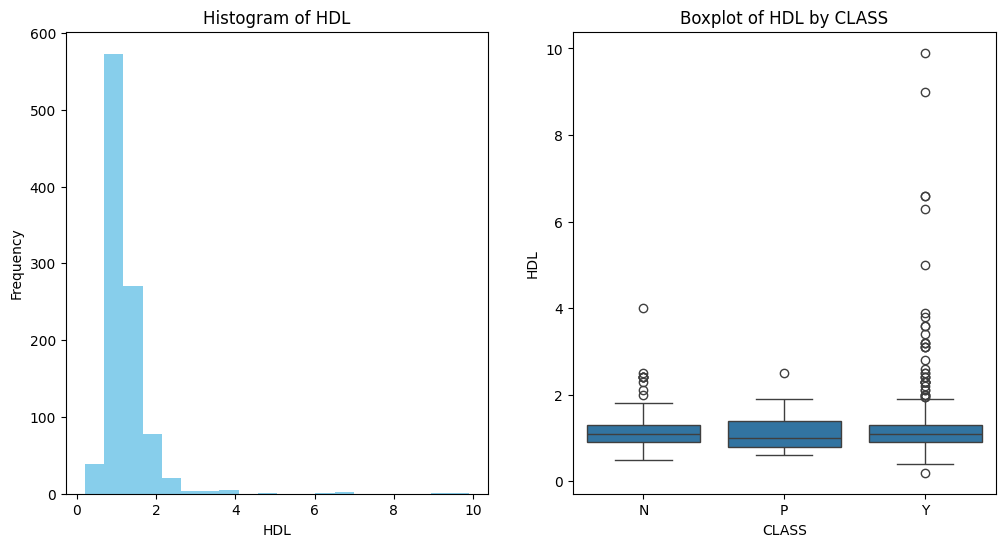

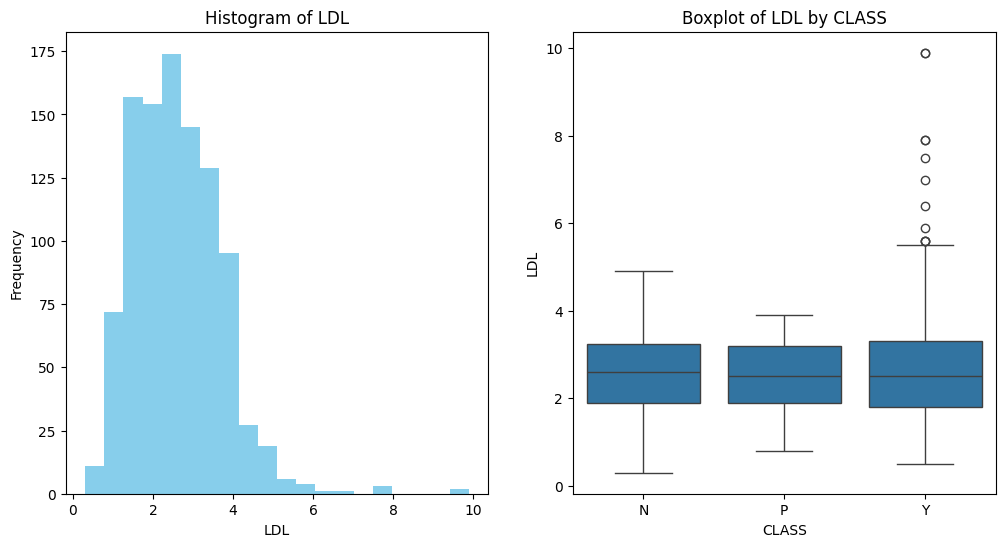

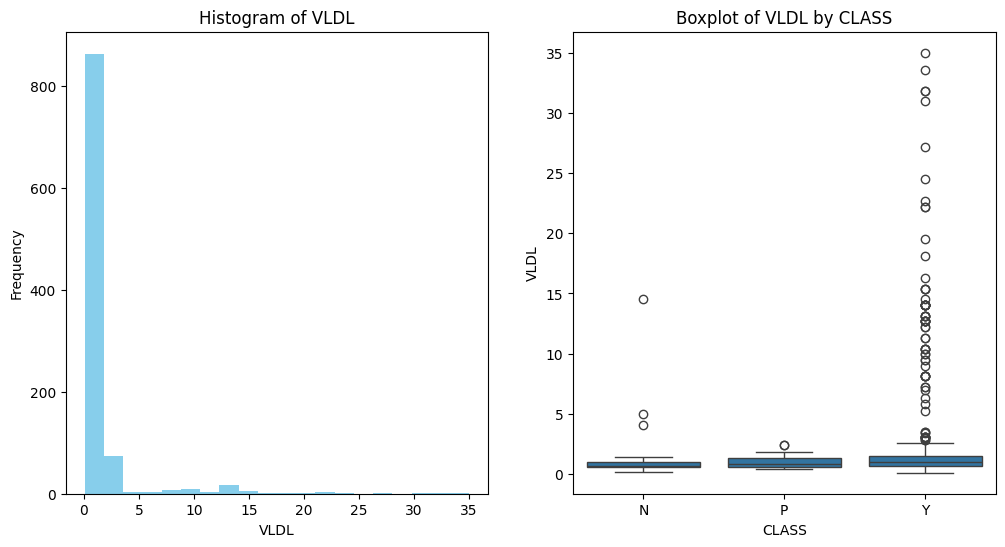

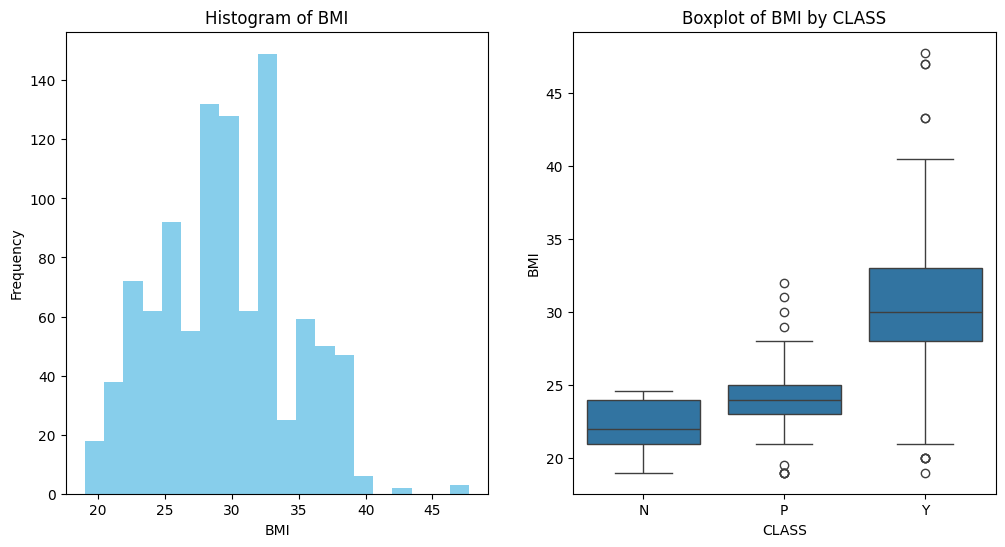

In [ ]:
import seaborn as sns


df["CLASS"] = df["CLASS"].str.strip().str.upper()



numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ["ID", "No_Pation"]]


for col in numeric_cols:
    vals = df[col].dropna()

    plt.figure(figsize=(12,6))

     #Histogram
    plt.subplot(1, 2, 1)
    plt.hist(vals, bins=20, color="skyblue")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

     # box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x="CLASS", y=col, data=df)
    plt.title(f"Boxplot of {col} by CLASS")
    plt.xlabel("CLASS")
    plt.ylabel(col)



plt.show()









 **graph description**

--------------------------------------------------------------------------------
🔹AGE
The histogram of AGE shows that most patients fall within a moderate age range, with values concentrated around the middle of the distribution. The boxplot indicates a generally balanced spread across the three classes (N, P, Y), with a few noticeable outliers—mainly within the “Y” class. These outliers will be handled during preprocessing, and normalization will help ensure consistent scaling of this feature in later modeling steps.

--------------------------------------------------------------------------------

🔹 UREA
The histogram of UREA shows a strong right skew, with most values concentrated near the lower range and only a small number extending to higher levels. The boxplot reveals several clear outliers across all classes, particularly in the “Y” class. This feature will require outlier handling and normalization during preprocessing to reduce skewness and maintain consistent scaling for modeling.

--------------------------------------------------------------------------------

🔹 CR
The histogram of CR shows a strong right skew, with most values clustered near the lower end and only a few observations extending to very high levels. The boxplot reveals numerous outliers across the three classes, particularly in the “Y” class. This feature will require careful outlier treatment and normalization during preprocessing to stabilize the range and reduce skewness before modeling.

--------------------------------------------------------------------------------

🔹 HbA1C
The histogram of HbA1c shows a moderately concentrated distribution, with most values falling within a central range and only slight skewness. The boxplot indicates noticeable outliers, particularly within the “Y” class, where higher values are more frequent. This feature will benefit from normalization and outlier handling to maintain consistent scaling and reduce the impact of extreme values during modeling.

--------------------------------------------------------------------------------

🔹 CHOL
The histogram of CHOL shows a roughly centered distribution with slight right skewness, where most values fall around the middle range. The boxplot indicates several outliers across the classes—particularly within the “Y” class. This feature may benefit from  normalization and selective outlier handling to maintain consistent scaling during preprocessing.

--------------------------------------------------------------------------------

🔹 TG
The histogram of TG shows a strong right skew, with most values concentrated at very low levels and only a small portion extending toward higher values. The boxplot reveals numerous outliers across all classes, especially within the “Y” class. Due to the wide spread and extreme observations, this feature will require robust outlier handling and appropriate normalization during preprocessing to achieve a more balanced and consistent distribution.

--------------------------------------------------------------------------------

🔹 HDL
The histogram of HDL shows a pronounced right skew, with most values concentrated near the lower end of the scale and only a few extending into higher ranges. The boxplot displays several outliers across all classes, particularly within the “Y” class. Due to the strong skewness, this feature will require both normalization and outlier handling during preprocessing to achieve smoother scaling and improve attribute consistency.

--------------------------------------------------------------------------------

🔹 LDL
The histogram of LDL shows a slight right-skewed distribution, with most values concentrated toward the lower end and gradually decreasing as values increase. The boxplot reveals a small number of outliers, particularly within the “Y” class. Light normalization and minor outlier handling will help keep this feature consistent with the other attributes during preprocessing

--------------------------------------------------------------------------------

🔹 VLDL
The histogram of VLDL shows extreme right skewness, with nearly all values clustered very close to zero and only a small number extending to higher levels. The boxplot highlights a large concentration of outliers, particularly within the “Y” class. Due to the highly compressed range and strong skewness, this feature requires robust normalization and careful outlier handling to reduce distortion and improve data uniformity during preprocessing.

--------------------------------------------------------------------------------

🔹 BMI
The histogram of BMI shows a moderately spread distribution with most values concentrated in the mid-range and only slight skewness. The boxplot indicates that the “Y” class has noticeably higher BMI values along with several outliers and in "p" , Light normalization and outlier handling will help maintain consistent scaling across classes during preprocessing.

--------------------------------------------------------------------------------

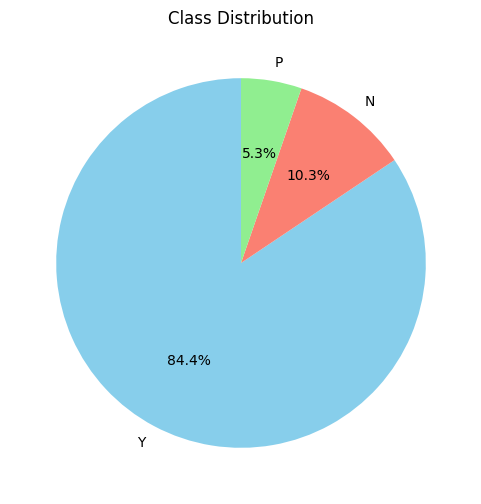

In [ ]:
# Clean CLASS column to remove duplicates
df_copy['CLASS'] = df_copy['CLASS'].astype(str).str.strip().str.upper()

# Plot showing class label distributions
plt.figure(figsize=(6, 6))
df_copy['CLASS'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['skyblue', 'salmon', 'lightgreen', 'orange'],
    startangle=90
)
plt.title("Class Distribution")
plt.ylabel('')
plt.show()



Pie chart for **class distribution**: shows the proportion of each class, indicating an imbalance between the categories.


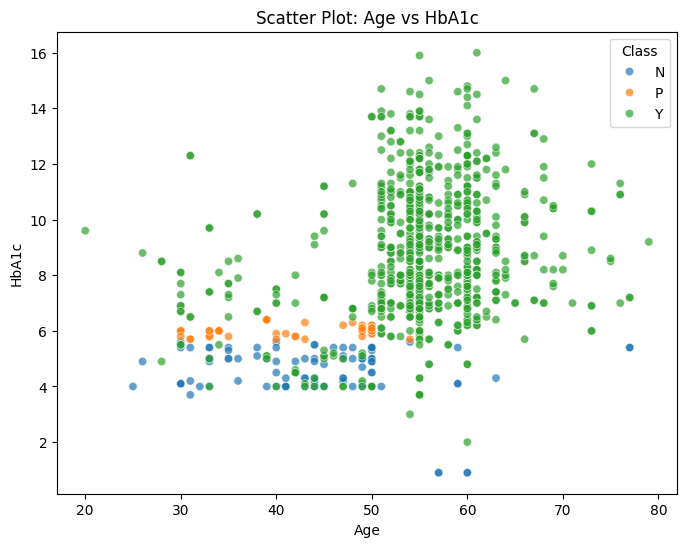

In [ ]:
# Clean CLASS
df['CLASS'] = df['CLASS'].astype(str)
df['CLASS'] = df['CLASS'].str.strip()
df['CLASS'] = df['CLASS'].str.upper()


# scatter plot (Age vs HbA1c)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['AGE'], y=df['HbA1c'], hue=df['CLASS'], alpha=0.7)
plt.title("Scatter Plot: Age vs HbA1c")
plt.xlabel("Age")
plt.ylabel("HbA1c")
plt.legend(title="Class")
plt.show()

The scatter plot shows the relationship between Age and HbA1c across the three classes (N, P, Y). Non-diabetic patients (N) mostly appear at lower HbA1c levels (4–6), indicating good glucose control. In contrast, diabetic classes (P and Y) cluster clearly above the 6.5 threshold, especially for patients aged 50 and above, where high HbA1c values become more frequent.

Overall, the plot suggests that older age is associated with higher HbA1c levels, and that diabetic individuals consistently show elevated readings compared to non-diabetics. This highlights Age and HbA1c as strong indicators for distinguishing between the classes in the dataset.

**1.4 Distribution of Gender and CLASS**

The following bar plots show how many males and females exist in the dataset, and how the samples are distributed among the classes (N, P, Y).

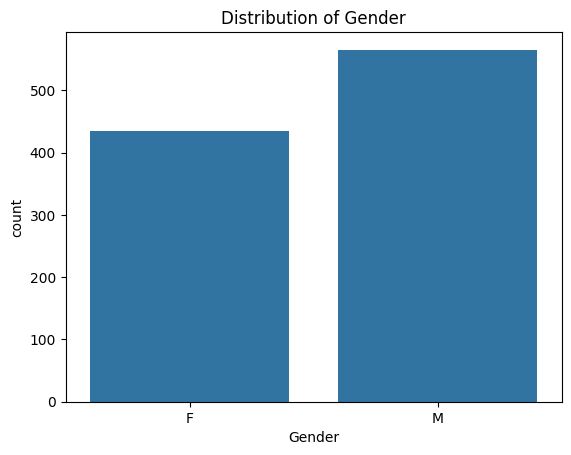

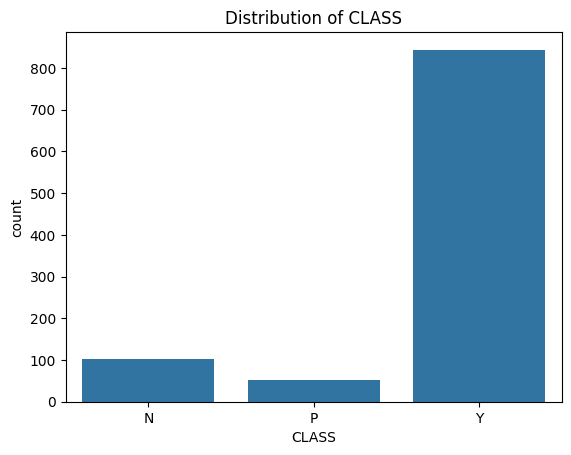

In [ ]:
# Clean duplicates in Gender and CLASS
df['Gender'] = df['Gender'].astype(str).str.strip().str.upper()
df['CLASS'] = df['CLASS'].astype(str).str.strip().str.upper()

# Bar plot for Gender
sns.countplot(x='Gender', data=df)
plt.title("Distribution of Gender")
plt.show()

# Bar plot for CLASS
sns.countplot(x='CLASS', data=df)
plt.title("Distribution of CLASS")
plt.show()


**1.5 Missing values:**

In [ ]:

# Display missing values count and percentage for each column

missing_counts = df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print()
rows_with_missing = df.isnull().sum(axis=1)
print("Rows with missing values:")
print(rows_with_missing);

Missing values in each column:
ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

Rows with missing values:
0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int64


All attributes (ID, No_Pation, Gender, AGE, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL, BMI, and CLASS) contain missing values represented by 0. This indicates that instead of being left blank, missing entries were recorded as zeros in the dataset. Therefore, these zero values need to be identified and treated appropriately during preprocessing, as they do not represent actual measured data. Note: The ID column is an identifier only and is not used for prediction. It also contains no missing values, confirming that all records are properly indexed

**Part 2 : Data Preprocessing**

In this part, we focus on improving the quality and consistency of the dataset before analysis. The preprocessing stage ensures that the data is clean, accurate, and suitable for the next phases of the project.  





**`Overview of Data Preprocessing Tasks`**


1. **Noise Removal:** This process involves identifying and handling missing values, detecting and removing outliers, and deleting duplicate records. These steps reduce data errors and make the dataset more reliable.
2.    **Normalization:** All numerical attributes are scaled to a common range to prevent large values from dominating smaller ones, helping models perform more accurately.


1.   **Correlation Analysis:** The relationships between different attributes are examined to identify how variables are connected and to avoid redundancy.



1.    **Discretization and Encoding:** Continuous numerical attributes are divided into categories, and categorical attributes are encoded into numerical form to make the data more suitable for machine learning algorithms.
2.   **Feature Selection and Final Dataset:** The most important features are selected to improve performance and efficiency. After completing all preprocessing steps, the final preprocessed dataset is saved for later use in the project.











### **2.1 Noise Removal**

1. **Checking for Missing Values**

In this part, the dataset is examined to identify whether any attributes contain missing or null values.
Detecting missing values is an important step before performing other preprocessing tasks because missing data can affect the accuracy of the analysis.
After running the check, it was found that all attributes in the dataset have zero missing values.

In [ ]:
#Check for missing values in the entire dataset
missing = df_copy.isna().sum()

#displaying the results
print("Missing values in each column:\n")
print(missing)

print("\ntotal number of missing values in the dataset:",missing.sum())


Missing values in each column:

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

total number of missing values in the dataset: 0


Although the initial missing value check showed that there were no missing values in the dataset, a further inspection revealed that some attributes contained zero or negative values.
Since these values are not realistic for medical measurements, they were treated as missing values.


In [ ]:
# Columns that must be strictly positive (> 0)
pos_cols = ['AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']

df_copy = df.copy()

# Replace values (<=0) with NaN
for c in pos_cols:
    df_copy.loc[df_copy[c] <= 0, c] = pd.NA


print("missing values (by marking impossible zeros/negatives):")
print(df_copy[pos_cols].isna().sum())


missing values (by marking impossible zeros/negatives):
AGE      0
Urea     0
Cr       0
HbA1c    0
Chol     1
TG       0
HDL      0
LDL      0
VLDL     0
BMI      0
dtype: int64


In [ ]:
# Calculate the mean for each column
column_means = df_copy.mean(numeric_only=True)

# Replace missing values with the mean of each column
df_copy = df_copy.fillna(column_means)

# After filling missing values
df_copy = df_copy.fillna(column_means)

# Convert AGE column to integer
df_copy['AGE'] = df_copy['AGE'].astype(int)


# Display the DataFrame after filling missing values
print("\nDataFrame after replacing missing values with column means:")
print(df_copy.head())
print(df_copy.shape)



DataFrame after replacing missing values with column means:
    ID  No_Pation Gender  AGE  Urea    Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62.0    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46.0    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  
(1000, 14)


Only values that cannot be valid (zeros or negatives in strictly-positive medical attributes) are marked as missing (NaN).  
After that, missing values are handled using by replacing the NaN with the average value of each column.


2. **Detecting and Removing Outliers**

In this part, the dataset is checked for extreme values that are far from the normal range.  
Outliers can affect the accuracy of analysis and may lead to incorrect results if not handled properly.  


Outlier Detection Comparison: Mean Method vs. IQR Method  

Two different methods were tested for detecting and removing outliers: the **Mean Method** and the **Interquartile Range (IQR) Method**.  
The Mean Method was tested first, but it did not give satisfactory results for this dataset, as it removed too few records and did not detect all the extreme values.  
Therefore, the IQR Method was used instead, as it provided a more accurate detection of outliers.


In [ ]:
print("Detecting and Removing Outliers using the Mean Method (for explanation only)")
print("This method was not used in preprocessing — only shown for clarification.\n")

df_mean_demo = df_copy.copy()
numeric_cols = ['AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']

for c in numeric_cols:
    mean = df_mean_demo[c].mean()
    differences_from_mean = abs(df_mean_demo[c] - mean)
    max_difference_index = differences_from_mean.idxmax()
    df_mean_demo = df_mean_demo.drop(max_difference_index)

print("Original shape:", df_copy.shape)
print("Shape after demo removals (Mean Method):", df_mean_demo.shape)
print("\nSample of data after demonstration:")
print(df_mean_demo.head())


Detecting and Removing Outliers using the Mean Method (for explanation only)
This method was not used in preprocessing — only shown for clarification.

Original shape: (1000, 14)
Shape after demo removals (Mean Method): (990, 14)

Sample of data after demonstration:
    ID  No_Pation Gender  AGE  Urea    Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62.0    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46.0    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


In [ ]:
print("Detecting and Removing Outliers using the IQR Method")


# Select only numeric columns
df_numeric = df_copy.select_dtypes(include=['number'])

# Calculate IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)
print("Number of outlier rows detected:", outliers.sum())

# Remove outliers
print("Original shape:", df_copy.shape)
df_copy = df_copy[~outliers]
print("New shape after removing outliers:", df_copy.shape)

# Small sample
print("\nSample of cleaned data")
print(df_copy.head())


Detecting and Removing Outliers using the IQR Method
Number of outlier rows detected: 371
Original shape: (1000, 14)
New shape after removing outliers: (629, 14)

Sample of cleaned data
     ID  No_Pation Gender  AGE  Urea    Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
5   634      34224      F   45   2.3  24.0    4.0   2.9  1.0  1.0  1.5   0.4   
6   721      34225      F   50   2.0  50.0    4.0   3.6  1.3  0.9  2.1   0.6   
7   421      34227      M   48   4.7  47.0    4.0   2.9  0.8  0.9  1.6   0.4   
13  132      34234      F   45   4.6  54.0    5.1   4.2  1.7  1.2  2.2   0.8   
14  402      34235      F   50   3.5  39.0    4.0   4.0  1.5  1.2  2.2   0.7   

     BMI CLASS  
5   21.0     N  
6   24.0     N  
7   24.0     N  
13  23.0     N  
14  24.0     N  


In [ ]:
# Ensure CLASS column is uppercase and spaces removed
df_copy['CLASS'] = df_copy['CLASS'].str.strip().str.upper()
df_copy['Gender'] = df_copy['Gender'].str.strip().str.upper()
print("Unique values in CLASS column after cleaning and converting to uppercase:")
print(df_copy['CLASS'].unique())
print(" values in  gender column after cleaning and converting to uppercase:")
print(df_copy['Gender'].unique())

Unique values in CLASS column after cleaning and converting to uppercase:
['N' 'P' 'Y']
 values in  gender column after cleaning and converting to uppercase:
['F' 'M']


In this step, the CLASS column was standardized to ensure consistency before performing further preprocessing tasks. Some records contained class labels in lowercase or with extra spaces (e.g., “y” or “Y ”), which could lead to mismatches during data analysis. To resolve this, all values in the CLASS column were converted to uppercase, and any surrounding spaces were removed. This guarantees that the labels are uniform and prevents issues such as duplicated records or incorrect groupings in later preprocessing stages.

3. **Detecting and Removing Duplicate Records**

In this part, the dataset is examined to check if any duplicate records exist, which could occur if the same patient’s information was entered more than once.  
After running the check, no duplicate rows were found in the dataset, confirming that each patient record is unique and that the data is already clean and consistent.


In [ ]:
print("\nChecking and removing duplicate rows")
dups = df_copy.duplicated().sum()
print("Number of duplicate rows:", dups)

if dups > 0:
    df_copy = df_copy.drop_duplicates()
    print("Duplicates removed. New shape:", df_copy.shape)
else:
    print("No duplicate rows found.")




Checking and removing duplicate rows
Number of duplicate rows: 0
No duplicate rows found.



### **2.2 Normalization**




In [ ]:

from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['BMI', 'Urea', 'Cr','Chol', 'TG', 'HDL', 'LDL', 'VLDL','HbA1c']
data_to_normlize = df_copy[columns_to_normalize]

# Min-Max scaling for selected columns
minmax_scaler = MinMaxScaler()
normlized_data_minmax = minmax_scaler.fit_transform(data_to_normlize)

# Replace the normalized values in the original DataFrame
df_copy[columns_to_normalize] = normlized_data_minmax

print("Min-Max scaled data:")
print(df_copy.head())



Min-Max scaled data:
     ID  No_Pation Gender  AGE      Urea        Cr     HbA1c      Chol  \
5   634      34224      F   45  0.157895  0.023810  0.153846  0.152542   
6   721      34225      F   50  0.118421  0.333333  0.153846  0.271186   
7   421      34227      M   48  0.473684  0.297619  0.153846  0.152542   
13  132      34234      F   45  0.460526  0.380952  0.238462  0.372881   
14  402      34235      F   50  0.315789  0.202381  0.153846  0.338983   

          TG       HDL       LDL      VLDL   BMI CLASS  
5   0.148936  0.400000  0.183673  0.142857  0.10     N  
6   0.212766  0.333333  0.306122  0.238095  0.25     N  
7   0.106383  0.333333  0.204082  0.142857  0.25     N  
13  0.297872  0.533333  0.326531  0.333333  0.20     N  
14  0.255319  0.533333  0.326531  0.285714  0.25     N  


 Normalization technique was applied to the numerical columns ( Urea, Cr, HbA1c, Chol, LDL, VLDL ,TG, HDL, BMI) to scale their values within the range of 0 to 1.
This process aims to eliminate differences in measurement scales between variables and enhance the accuracy of statistical analysis and subsequent models.
After applying normalization, all selected columns were transformed to the same range, making it easier to compare features without larger values dominating the results.

#### **Discretization**

In [ ]:
#Discretization for column (Age)
columns_to_Discretize = 'AGE'

#The boundaries of the bins
bns = [0, 30 , 50 , 100]

#Labels for the age groups
labls = ['0-30' , '31-50' , '51-100']

#Perform discretization using cut function
df_copy['AgeGroup'] = pd.cut(df_copy[columns_to_Discretize] , bins=bns , labels= labls )

#Display the Discretizied columns
print("original DataFrame:")
print(df_copy[['AGE' ,'AgeGroup']])

original DataFrame:
     AGE AgeGroup
5     45    31-50
6     50    31-50
7     48    31-50
13    45    31-50
14    50    31-50
..   ...      ...
965   54   51-100
973   50    31-50
978   52   51-100
991   55   51-100
999   54   51-100

[629 rows x 2 columns]


We applied **discretization** to the "**Age**" column, grouping it into meaningful ranges: [0–30, 31–50, 51–100]. This reduces noise, makes the data easier to interpret, and helps the model capture patterns more effectively than using raw continuous values.

### **2.3 Encoding**

In [ ]:
le = LabelEncoder()
df_copy['Gender'] = le.fit_transform(df_copy['Gender'])
df_copy['CLASS'] = le.fit_transform(df_copy['CLASS'])
df_copy['AgeGroup'] = le.fit_transform(df_copy['AgeGroup'])
print(df_copy)

      ID  No_Pation  Gender  AGE      Urea        Cr     HbA1c      Chol  \
5    634      34224       0   45  0.157895  0.023810  0.153846  0.152542   
6    721      34225       0   50  0.118421  0.333333  0.153846  0.271186   
7    421      34227       1   48  0.473684  0.297619  0.153846  0.152542   
13   132      34234       0   45  0.460526  0.380952  0.238462  0.372881   
14   402      34235       0   50  0.315789  0.202381  0.153846  0.338983   
..   ...        ...     ...  ...       ...       ...       ...       ...   
965  159      45446       1   54  0.513158  0.785714  0.369231  0.796610   
973  170      45395       1   50  0.486842  0.571429  0.461538  0.542373   
978  176      45445       1   52  0.526316  0.571429  0.384615  0.932203   
991  195       4543       0   55  0.394737  0.142857  0.915385  0.576271   
999  248      24054       1   54  0.513158  0.535714  0.376923  0.305085   

           TG       HDL       LDL      VLDL   BMI  CLASS  AgeGroup  
5    0.148936  0.4

**Encoding** was applied to the "**CLASS**" , "**Gender**" and "**AgeGroup**"columns, converting their categorical values into numeric form. This ensures all data is numeric, consistent, and ready for analysis and modeling.

### **2.4 Correlation**

 **1. correlation coefficient (for numric attributes)**

In [ ]:

import pandas as pd
import numpy as np




# Calculate the correlation matrix for numeric columns only
corr_df = df_copy.drop(columns=["ID", "No_Pation"])
correlation_matrix = corr_df.select_dtypes(include=["int64", "float64"]).corr()


# Loop through all numeric column pairs
print(" print all correlatied pairs : \n")
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        col1 = correlation_matrix.columns[i]   # define first column name
        col2 = correlation_matrix.columns[j]   # define second column name
        corr_value =correlation_matrix.iloc[i, j]  # get correlation value
        print(f"{col1} ↔ {col2} = {corr_value:.3f}")


# Set the threshold for high correlation
correlation_threshold = 0.75

# Find all pairs of attributes with correlation >= 0.75
highly_correlated_pairs = np.where(np.abs(correlation_matrix) >= correlation_threshold)

# Get all numeric column names
numeric_attributes = list(df_copy.select_dtypes(include='number'))

# Create a set to store attributes that will be removed
attributes_to_remove =set()


# Loop through correlated pairs and mark one attribute from each pair
for i, j in zip(*highly_correlated_pairs):
    if i != j and numeric_attributes[i] not in attributes_to_remove and numeric_attributes[j] not in attributes_to_remove:
        attribute_i = numeric_attributes[i]
        attribute_j = numeric_attributes[j]
        attributes_to_remove.add(attribute_j)

# Print the attributes that have high correlation before removing them
print(" \n Highly correlated attributes :")
print(attributes_to_remove)

# Remove the highly correlated attributes from the dataset
df_filtered = df_copy.drop(columns=attributes_to_remove)

# Print the original and filtered dataframes
print("\nOriginal Data:")
print(df)
print("\nDataFrame after removing highly correlated attributes:")
print(df_filtered)




 print all correlatied pairs : 

AGE ↔ Gender = -0.002
Urea ↔ Gender = 0.177
Urea ↔ AGE = 0.156
Cr ↔ Gender = 0.353
Cr ↔ AGE = 0.053
Cr ↔ Urea = 0.529
HbA1c ↔ Gender = -0.086
HbA1c ↔ AGE = 0.424
HbA1c ↔ Urea = -0.001
HbA1c ↔ Cr = -0.148
Chol ↔ Gender = -0.083
Chol ↔ AGE = 0.058
Chol ↔ Urea = -0.038
Chol ↔ Cr = -0.006
Chol ↔ HbA1c = 0.142
TG ↔ Gender = -0.025
TG ↔ AGE = 0.070
TG ↔ Urea = -0.014
TG ↔ Cr = 0.026
TG ↔ HbA1c = 0.151
TG ↔ Chol = 0.405
HDL ↔ Gender = -0.087
HDL ↔ AGE = -0.022
HDL ↔ Urea = -0.044
HDL ↔ Cr = -0.082
HDL ↔ HbA1c = 0.022
HDL ↔ Chol = 0.123
HDL ↔ TG = -0.100
LDL ↔ Gender = -0.007
LDL ↔ AGE = -0.049
LDL ↔ Urea = -0.028
LDL ↔ Cr = 0.087
LDL ↔ HbA1c = -0.034
LDL ↔ Chol = 0.414
LDL ↔ TG = 0.044
LDL ↔ HDL = -0.231
VLDL ↔ Gender = -0.051
VLDL ↔ AGE = 0.037
VLDL ↔ Urea = -0.090
VLDL ↔ Cr = -0.041
VLDL ↔ HbA1c = 0.191
VLDL ↔ Chol = 0.266
VLDL ↔ TG = 0.695
VLDL ↔ HDL = -0.023
VLDL ↔ LDL = -0.006
BMI ↔ Gender = 0.004
BMI ↔ AGE = 0.439
BMI ↔ Urea = 0.026
BMI ↔ Cr = -0.043
BMI

This part of the code computes the correlation matrix between all numeric features in the dataset and prints the correlation values for each pair that includes VLDL. The results show that VLDL has  positive correlations with TG ,and a negative correlation with HDL. After checking for highly correlated pairs using the defined threshold (0.75), the program printed an empty set set() as shown, indicating that no attribute pairs exceeded the correlation limit chosen.

**2. chi squared (for the catogrical attributes )**

In [ ]:
from scipy.stats import chi2_contingency


# Create a  table for Gender and CLASS
table = pd.crosstab(df_copy['Gender'], df_copy['CLASS'])
print("the table:")
print(table)

# Perform the chi-square test
chi2_, p_value, dof, expected = chi2_contingency(table)

print("Chi-Square Statistic:", chi2_)
print("Degrees of Freedom:", dof)
print("p-value:", p_value)
print("Expected Frequencies:")
print(expected)

the table:
CLASS    0   1    2
Gender             
0       29   7  267
1       18  18  290
Chi-Square Statistic: 7.5332537903412335
Degrees of Freedom: 2
p-value: 0.023129951602102464
Expected Frequencies:
[[ 22.64069952  12.04292528 268.3163752 ]
 [ 24.35930048  12.95707472 288.6836248 ]]



This code performs a Chi-Square test between Gender and CLASS.
 The p-value indicates whether there is a statistically significant relationship.

 If p-value ≤ 0.05 → reject H0 (there is a relationship),  (as shown )

 If p-value > 0.05 → fail to reject H0 (no significant relationship).

### **2.5 Feature Selection**

In [ ]:
# =========================================
# Wrapper Feature Selection (RFE)
# No protected features – RFE is fully in control
# =========================================

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# ---------- BEFORE SELECTION ----------
print("=== BEFORE FEATURE SELECTION ===")
print("Columns:", list(df_copy.columns))
print("Shape  :", df_copy.shape)
print("================================\n")

target_col = "CLASS"
y = df_copy[target_col]
X_all = df_copy.drop(columns=[target_col], errors="ignore")

# 1) Remove ID-like columns (if exist)
id_cols = ["ID", "No_Pation"]
removed_id_cols = []
for col in id_cols:
    if col in X_all.columns:
        X_all = X_all.drop(columns=[col])
        removed_id_cols.append(col)

if removed_id_cols:
    print("\nRemoved ID-like columns from X_all:", removed_id_cols)
else:
    print("\nNo ID-like columns removed from X_all.")

# 2) X_numeric = numeric features only
X_numeric = X_all.select_dtypes(include=["number"]).copy()

if X_numeric.shape[1] == 0:
    raise ValueError("No numeric features available for RFE after preprocessing.")

print("\nNumeric features BEFORE RFE:", list(X_numeric.columns))

# 3) RFE model
model = LogisticRegression(max_iter=2000, solver="lbfgs")

# Total wanted numeric features
total_features_wanted = 6   # change this number if you want more/less
n_numeric = X_numeric.shape[1]
n_features_to_keep = min(total_features_wanted, n_numeric)

print(f"\nRFE will keep {n_features_to_keep} numeric feature(s).")

# 4) Run RFE
rfe = RFE(estimator=model, n_features_to_select=n_features_to_keep)
rfe.fit(X_numeric, y)

selected_numeric_features = list(X_numeric.columns[rfe.support_])
dropped_numeric_features = [c for c in X_numeric.columns if c not in selected_numeric_features]

print("\n=== RFE RESULTS (NUMERIC FEATURES) ===")
print("Selected numeric features:", selected_numeric_features)
print("Dropped numeric features :", dropped_numeric_features if dropped_numeric_features else "None")

# 5) Build final feature list:
#    - selected numeric features
#    - + target column only
columns_to_keep = selected_numeric_features + [target_col]

# Columns actually removed
columns_removed = [c for c in df_copy.columns if c not in columns_to_keep]

# 6) Apply selection
df_copy = df_copy[columns_to_keep].copy()

# ---------- AFTER SELECTION ----------
print("\n=== AFTER FEATURE SELECTION ===")
print("Removed columns :", columns_removed if columns_removed else "None")
print("Remaining columns:", list(df_copy.columns))
print("Shape after selection:", df_copy.shape)
print("\nSample of final dataset (first 5 rows):")
print(df_copy.head())
print("================================")


=== BEFORE FEATURE SELECTION ===
Columns: ['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS', 'AgeGroup']
Shape  : (629, 15)


Removed ID-like columns from X_all: ['ID', 'No_Pation']

Numeric features BEFORE RFE: ['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'AgeGroup']

RFE will keep 6 numeric feature(s).

=== RFE RESULTS (NUMERIC FEATURES) ===
Selected numeric features: ['HbA1c', 'Chol', 'TG', 'VLDL', 'BMI', 'AgeGroup']
Dropped numeric features : ['Gender', 'AGE', 'Urea', 'Cr', 'HDL', 'LDL']

=== AFTER FEATURE SELECTION ===
Removed columns : ['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HDL', 'LDL']
Remaining columns: ['HbA1c', 'Chol', 'TG', 'VLDL', 'BMI', 'AgeGroup', 'CLASS']
Shape after selection: (629, 7)

Sample of final dataset (first 5 rows):
       HbA1c      Chol        TG      VLDL   BMI  AgeGroup  CLASS
5   0.153846  0.152542  0.148936  0.142857  0.10         0      0
6  

**Wrapper Method (RFE)**

First, I used the Filter Method (ANOVA F-test) to select features, but this approach caused several problems. The filter method evaluates each feature individually and only works with numerical columns, which led it to remove some meaningful attributes simply because they did not show strong statistical results on their own. It also ignores the relationships between features, so it may drop attributes that only become useful when combined with others. Because of these limitations, the filter method did not fully represent the actual importance of the features in my dataset and produced results that were not reliable for the prediction task.

To address this issue, I switched to the Wrapper Method (RFE), which selects features based on how much they actually help the model during prediction. RFE trains the model, measures the contribution of each feature, and removes the ones that add little or no value. Before RFE begins the selection process, the script automatically removes non-informative features such as **ID** and **No_Pation**, since these fields do not provide any predictive meaning and would only add noise to the model. After dropping these unnecessary identifiers

RFE then attributes at once and compared how much each feature improved the model’s classification performance. Although some of these medical measurements are related, they each carry different clinical information, and the wrapper method considers these relationships during evaluation. Even though RFE is capable of removing weak, redundant, or overlapping attributes, the final result showed that **all six features were selected**. This means that every remaining attribute contributed meaningful information to the prediction process, and none of them were considered unnecessary or repetitive by the model.

In the final result, RFE retained all six important predictors, producing a clean and effective feature set consisting of **HbA1c, Chol, TG, VLDL, BMI, AgeGroup**, and the target variable **CLASS**. The wrapper method confirmed that the preprocessing and cleaning steps successfully removed unhelpful attributes, and the features that remained were genuinely valuable for the diabetes risk prediction task.

**To Upload the pre-processed data**

In [ ]:
# Save the cleaned data (df_copy)

df_copy.to_csv("Preprocessed_Dataset.csv", index=False, encoding="utf-8-sig")

from google.colab import files
files.download("Preprocessed_Dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **[5] Data Mining Technique**

### **[5.1]classification technique**



*  Before applying the Decision Tree classifier, we removed columns that should not be used as input features. Specifically, the columns ID and No_Pation were dropped because they are identifier fields and do not carry any medical meaning. We also ensured that the CLASS column (the label) was not included in the feature matrix (X). Instead, it was used only as the target variable (y) during training and evaluation. This guarantees that the model does not see the class label as an input while making predictions.



-------------------------------------------------------------------------------



*  Train-Test Partitioning Using Multiple Split Sizes
As required, the dataset was split using three different ratios:
 • 70% training / 30% testing
 • 60% training / 40% testing
 • 80% training / 19% testing
Using multiple splits helps us observe how the model behaves when the amount of training data changes. Generally, larger training portions improve learning, while larger testing portions provide a more balanced evaluation.
Why the 80/20 Split Appears as 80/19
Because we used stratified splitting, each class must maintain the same proportion in both training and testing sets. Our dataset is imbalanced (Class 0 is very small, Class 1 moderate, Class 2 the majority). Due to these proportions, scikit-learn sometimes assigns 19 samples instead of exactly 20 to preserve class balance. This behavior is normal and correct when using stratify=y.


-------------------------------------------------------------------------------



*  Two impurity measures were applied:
 • Gini Index
 • Information Gain (Entropy)
Gini is the default criterion, while entropy is added manually. Using both allows us to compare how each measure chooses splits and whether one produces deeper or simpler trees. In our case, both criteria produced very similar accuracy, with minor structural differences in the tree.


-------------------------------------------------------------------------------

*  For each split size and each impurity measure, we performed:

   • Training the Decision Tree classifier

   • Predicting class labels on the testing set

   • Calculating accuracy

   • Generating confusion matrices

   • Producing classification reports (precision, recall, F1-score)

   • Visualizing the Decision Tree structure

This evaluation shows how consistent the model is across different settings.


-------------------------------------------------------------------------------



*  All results were visualized using:

   • ConfusionMatrixDisplay for misclassification patterns
  
   • plot_tree() for understanding how the tree makes decisions



-------------------------------------------------------------------------------



*    The 80/20 split appeared as 19% instead of 20% because stratified splitting preserves class proportions, and the small size of class 0 makes perfect numerical division impossible.



--------------------------------------------------------------------------------











Split 70/30 - Criterion: gini
Accuracy: 0.9788359788359788
Confusion Matrix:
 [[ 13   0   1]
 [  1   7   0]
 [  0   2 165]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.78      0.88      0.82         8
           2       0.99      0.99      0.99       167

    accuracy                           0.98       189
   macro avg       0.90      0.93      0.91       189
weighted avg       0.98      0.98      0.98       189



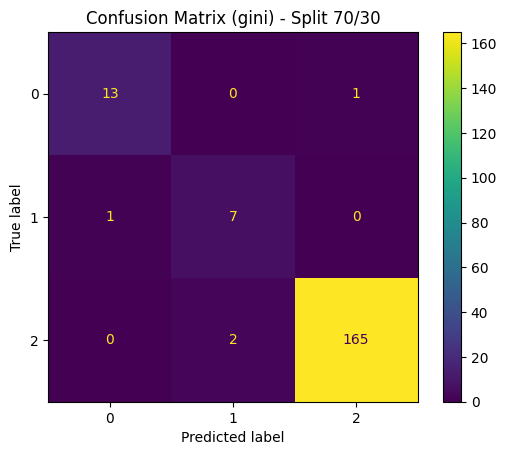

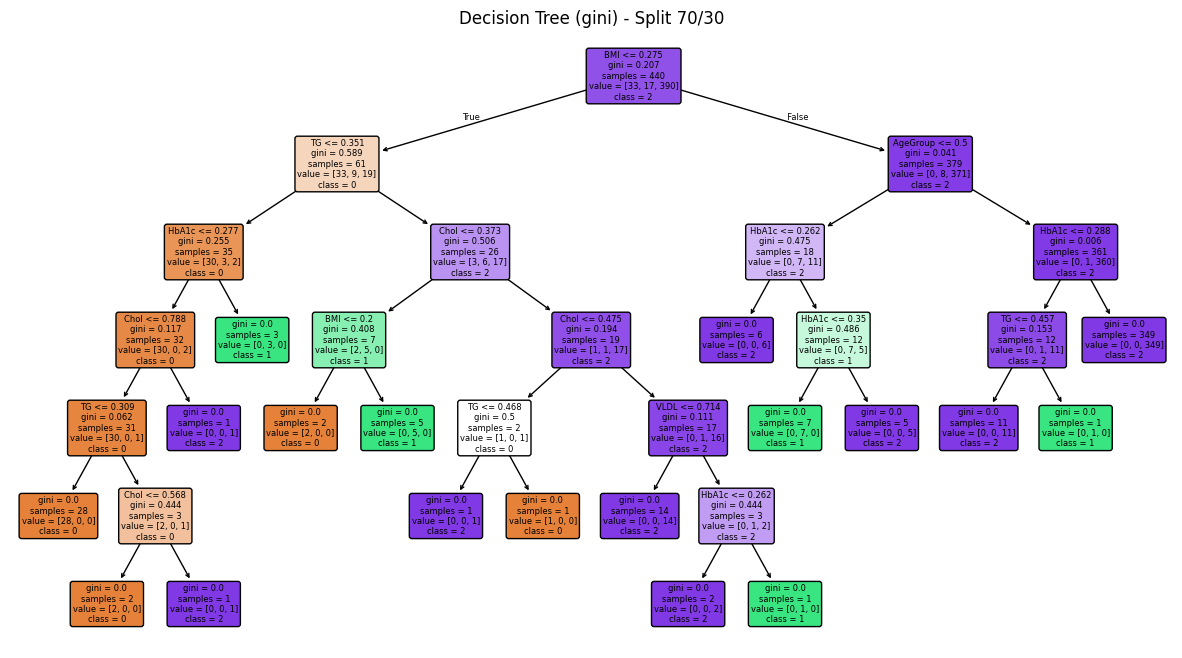


Split 70/30 - Criterion: entropy
Accuracy: 0.9947089947089947
Confusion Matrix:
 [[ 14   0   0]
 [  0   8   0]
 [  1   0 166]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      1.00      1.00         8
           2       1.00      0.99      1.00       167

    accuracy                           0.99       189
   macro avg       0.98      1.00      0.99       189
weighted avg       1.00      0.99      0.99       189



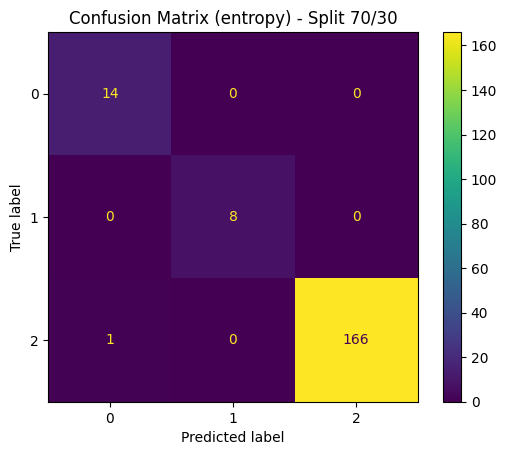

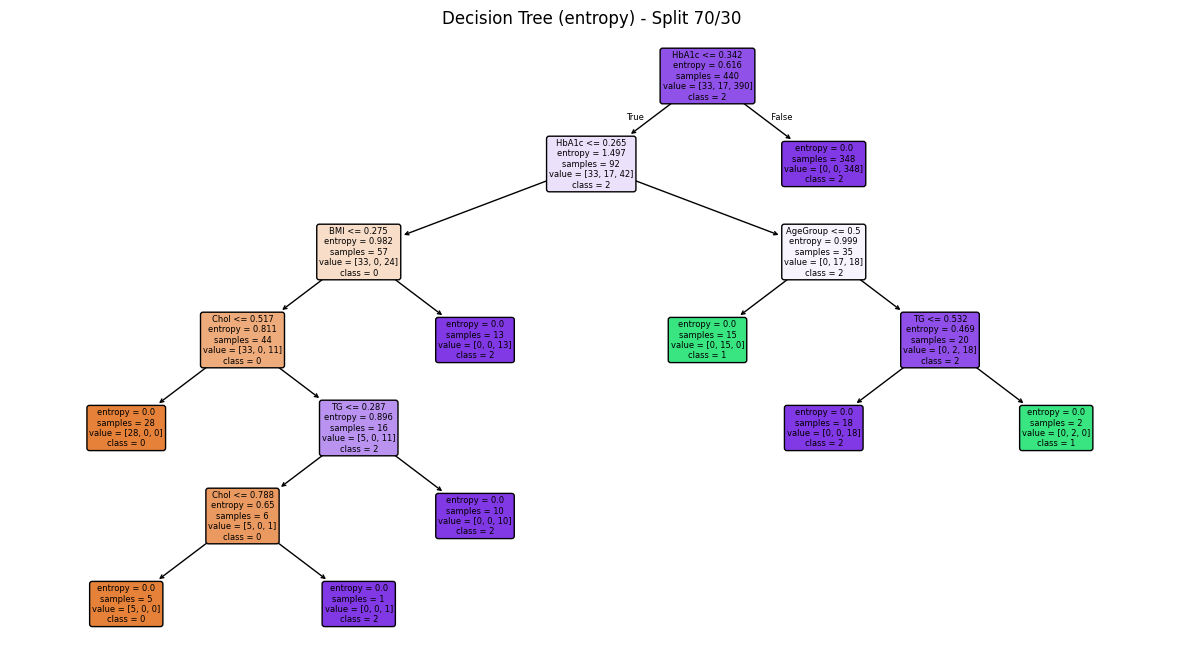


Split 60/40 - Criterion: gini
Accuracy: 0.9801587301587301
Confusion Matrix:
 [[ 17   0   2]
 [  0  10   0]
 [  1   2 220]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.83      1.00      0.91        10
           2       0.99      0.99      0.99       223

    accuracy                           0.98       252
   macro avg       0.92      0.96      0.94       252
weighted avg       0.98      0.98      0.98       252



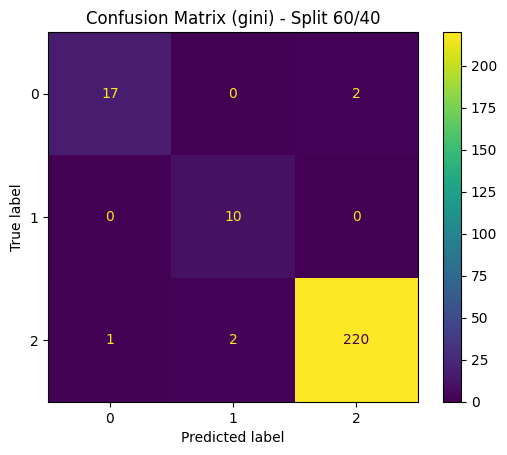

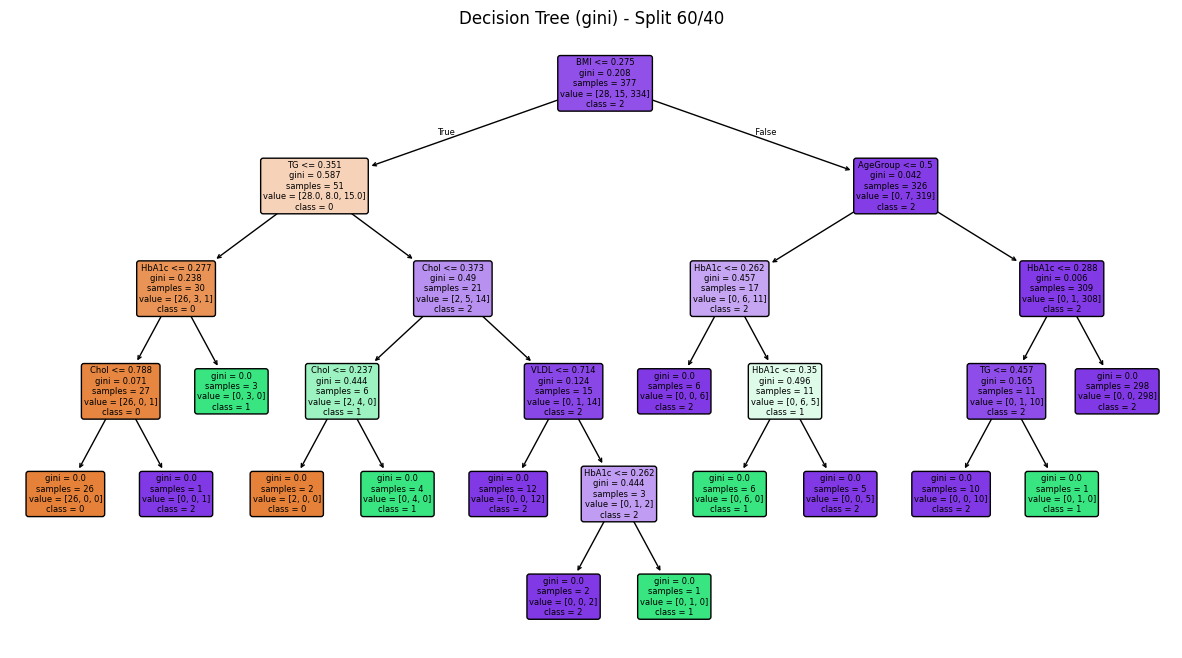


Split 60/40 - Criterion: entropy
Accuracy: 0.9880952380952381
Confusion Matrix:
 [[ 16   0   3]
 [  0  10   0]
 [  0   0 223]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       1.00      1.00      1.00        10
           2       0.99      1.00      0.99       223

    accuracy                           0.99       252
   macro avg       1.00      0.95      0.97       252
weighted avg       0.99      0.99      0.99       252



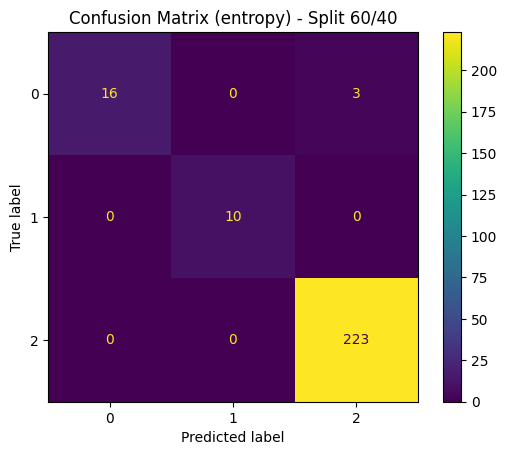

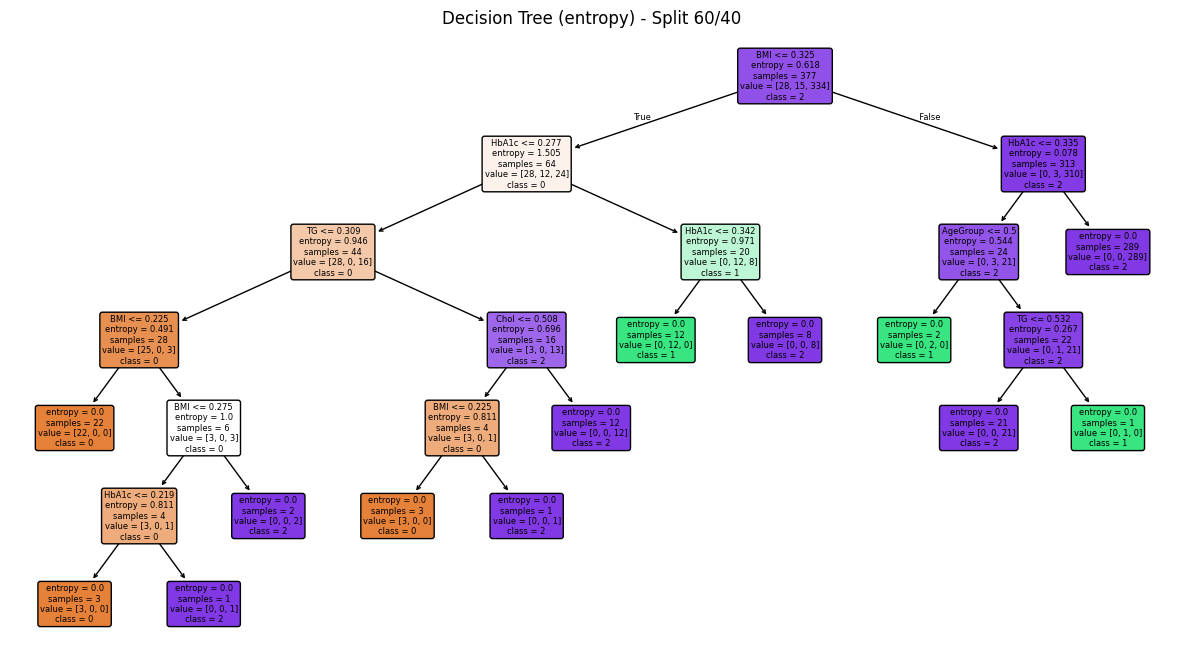


Split 80/19 - Criterion: gini
Accuracy: 0.9841269841269841
Confusion Matrix:
 [[  9   0   0]
 [  0   5   0]
 [  0   2 110]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.71      1.00      0.83         5
           2       1.00      0.98      0.99       112

    accuracy                           0.98       126
   macro avg       0.90      0.99      0.94       126
weighted avg       0.99      0.98      0.99       126



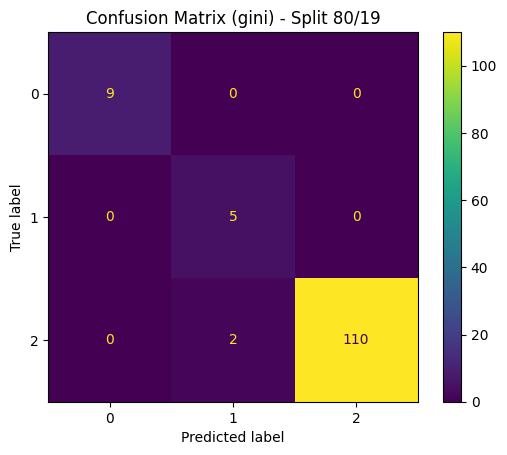

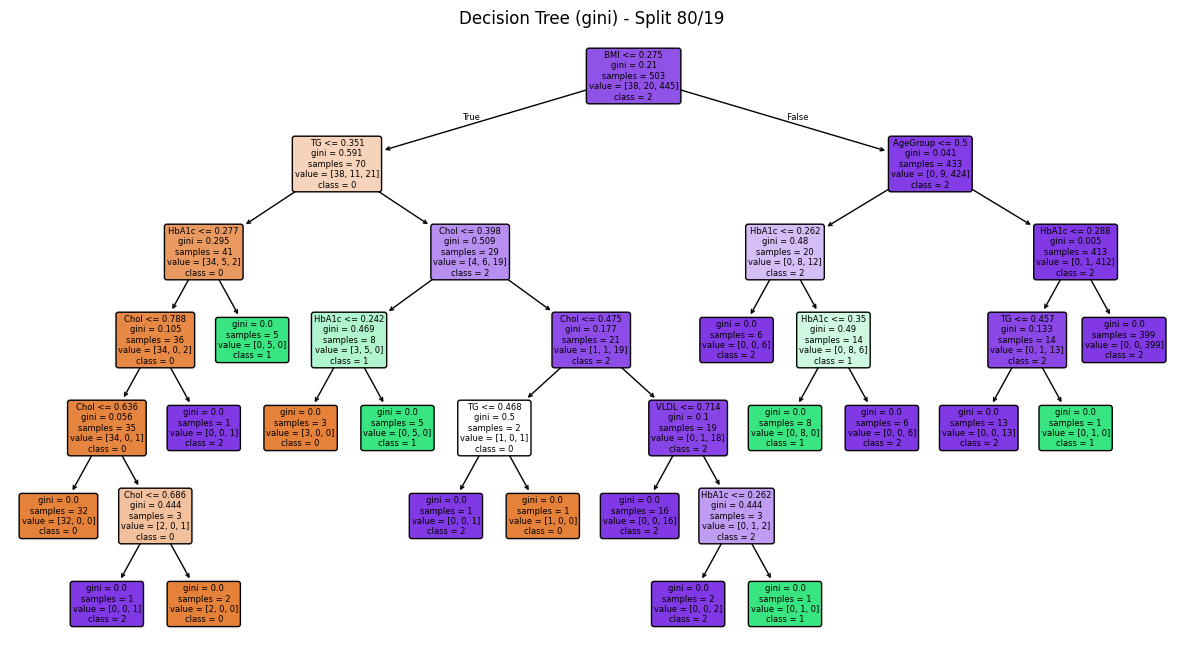


Split 80/19 - Criterion: entropy
Accuracy: 0.9920634920634921
Confusion Matrix:
 [[  9   0   0]
 [  0   5   0]
 [  1   0 111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      1.00      1.00         5
           2       1.00      0.99      1.00       112

    accuracy                           0.99       126
   macro avg       0.97      1.00      0.98       126
weighted avg       0.99      0.99      0.99       126



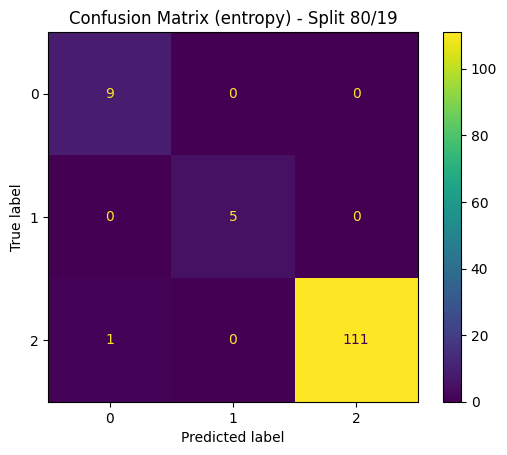

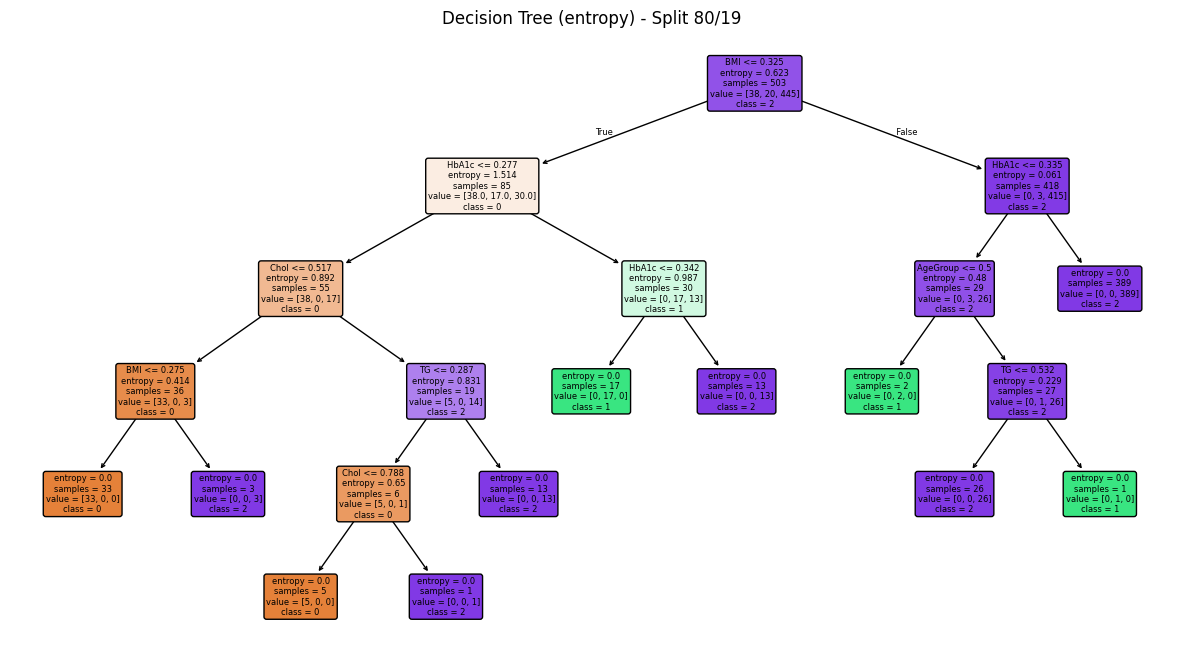


Final Results:
    split criterion  accuracy
0  70/30      gini  0.978836
1  70/30   entropy  0.994709
2  60/40      gini  0.980159
3  60/40   entropy  0.988095
4  80/19      gini  0.984127
5  80/19   entropy  0.992063


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


url="https://raw.githubusercontent.com/yaraaldos/Diabetes-risk-prediction/refs/heads/main/Dataset/Preprocessed_Dataset.csv"

data = pd.read_csv(url)


target_col = 'CLASS'

X = data.drop(columns=[target_col])
y = data[target_col]

feature_names = X.columns
class_names = y.unique().astype(str)

splits = [0.7, 0.6, 0.8]
criteria = ["gini", "entropy"]
results = []

for s in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=(1 - s), random_state=42, stratify=y
    )

    for c in criteria:
        clf = DecisionTreeClassifier(criterion=c, random_state=42)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        print(f"\nSplit {int(s*100)}/{int((1-s)*100)} - Criterion: {c}")
        print("Accuracy:", acc)
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", classification_report(y_test, y_pred))

        results.append({
            "split": f"{int(s*100)}/{int((1-s)*100)}",
            "criterion": c,
            "accuracy": acc
        })

        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot()
        plt.title(f"Confusion Matrix ({c}) - Split {int(s*100)}/{int((1-s)*100)}")
        plt.show()

        plt.figure(figsize=(15, 8))
        plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, fontsize=6)
        plt.title(f"Decision Tree ({c}) - Split {int(s*100)}/{int((1-s)*100)}")
        plt.show()

results_df = pd.DataFrame(results)
print("\nFinal Results:\n", results_df)



**description of the** **Result**



*  After applying Decision Tree classification using the three split sizes (70/30, 60/40, and 80/20) and both attribute selection measures (Gini and Entropy), the overall results were stable and consistently high, with accuracy ranging from 0.97 to 0.99 across all settings. The differences between the splits were very small: in some cases the 60/40 split slightly outperformed 70/30. This fluctuation is normal and reflects small variations in how the data is partitioned.

-------------------------------------------------------------------------------




*   For the size 70% :

Using Gini :
Class 0: There is one misclassification, where one instance was predicted as class 2 instead of class 0.

Class 1: There is one misclassification, where one instance was predicted as class 0 instead of class 1.

Class 2: There is two misclassification, where two instance was predicted as class 1 instead of class 2.



using entropy:

Class 0: All instances were correctly classified with no errors.

Class 1: All instances were also correctly classified with no errors.

Class 2: There is only one misclassification, where one instance of class 2 was predicted as class 0.



-------------------------------------------------------------------------------

*  For the size 60% :



Using Gini :

Class 0: There are two misclassifications, where two instances were predicted as class 2 instead of class 0.

Class 1: All instances were correctly classified with no errors.

Class 2: There are three misclassifications: – one instance predicted as class 0, – and two instances predicted as class 1.


using entropy:Class 0: There are three misclassifications, where three instances were predicted as class 2 instead of class 0.

Class 1: All instances were correctly classified with no errors.

Class 2: All instances were also correctly classified with no errors.


-------------------------------------------------------------------------------

*   For the size 80% :



Using Gini :

Class 0: All instances were correctly classified with no errors.

Class 1: All instances were also correctly classified with no errors.

Class 2: There are two misclassifications, where two instances were predicted as class 1 instead of class 2.


using entropy:


Class 0: All instances were also classified correctly with no errors.

Class 1: All instances were also classified correctly with no errors.

Class 2: There is one misclassification, where one instance of class 2 was predicted as class 0.


--------------------------------------------------------------------------------

*   general note about the matrix :

*   Across all three train-test splits (70/30, 60/40, and 80/19), the entropy-based Decision Tree consistently outperformed the gini model. In each split, the entropy model produced fewer misclassifications and achieved higher overall accuracy.
Therefore, the entropy criterion is considered the best-performing model for this dataset, providing more reliable and stable classification results compared to gini.


*   Across all train–test splits and both criteria (gini and entropy), Class 2 consistently had the highest number of misclassifications. This is mainly because Class 2 is the majority class, meaning it has the largest number of instances, which increases the chance of confusion with neighboring classes. Additionally, its feature values overlap with those of Class 1, making the decision boundaries less distinct. As a result, the model occasionally misclassifies Class 2 instances into other classes.




--------------------------------------------------------------------------------


*  Decision Tree (Gina – Split 70/30)

The Gini tree mainly uses BMI as the first and most important split, which means BMI is the strongest predictor in this setting. After that, the tree uses a few medical features such as HbA1c, TG, and Chol to separate the remaining samples.
Most branches end in Class 2, which matches the fact that Class 2 is the majority in the dataset. The smaller branches separate Class 0 and Class 1 when their values differ clearly.

Decision Tree (Entropy – Split 70/30)
The Entropy tree begins with HbA1c, meaning it is the most informative feature for separating the classes. Then, it mainly uses BMI and AgeGroup to further distinguish the samples.
Just like the Gini tree, most leaves end in Class 2, but the splits in the entropy tree are cleaner and lead to fewer mistakes, which matches its higher accuracy.


--------------------------------------------------------------------------------


*   Decision Tree (gini – Split 60/30)

The Gini tree for the 60/40 split mainly relies on BMI as the first and most important split, which means BMI is the feature that best separates the classes in this partition. After the initial split, the tree uses a few supporting attributes such as TG, HbA1c, and Chol to separate the smaller classes.
Most of the right side of the tree leads to Class 2, which matches the fact that Class 2 is the majority class in the dataset.




Decision Tree (Entropy – Split 60/30)


The entropy tree begins with BMI, but very quickly uses HbA1c as the next main split, confirming again that these two features carry most of the information. The left side separates Class 0 and Class 1 using combinations of TG, BMI, and Chol.
The right side of the tree places most samples into Class 2, and uses HbA1c and AgeGroup to make the splits cleaner



--------------------------------------------------------------------------------


*   Decision Tree (gini – Split 80/19)

The Gini tree for the 80/19 split begins with BMI, which means it is the feature that best separates the classes in this partition.After this main split, the tree uses TG, HbA1c, and Chol on the left side to refine the separation between Class 0 and Class 1 when the samples are smaller.
On the right side of the tree, the model quickly predicts Class 2, and uses AgeGroup and HbA1c to make the split more accurate.





Decision Tree (entropy– Split 80/19)

The entropy tree for the 80/19 split starts with BMI, which means BMI is the most informative feature for separating the classes in this partition. After this main split, the left branch uses Chol, HbA1c, and TG to separate Class 0 and Class 1 when needed.
On the right side of the tree, most samples directly fall into Class 2, and the tree only uses HbA1c, AgeGroup, and TGto refine the remaining cases


--------------------------------------------------------------------------------

*   An important observation in the decision trees is that Class 0 and Class 1 often appear together in the same branch during the early splits. This happens because their feature values are very similar, making them harder to separate at the beginning. In contrast, Class 2 has much clearer patterns, so the tree isolates it first, and only later performs additional splits to distinguish Class 0 from Class 1.”

--------------------------------------------------------------------------------

*   Overall, the consistency across all split sizes and both impurity measures shows that the dataset is highly separable, and the model generalizes well. The stability of the results confirms that the classifier is not overfitting and that the patterns in the data are strong, clear, and easy for the model to learn.

--------------------------------------------------------------------------------



--------------------------------------------------------------------------------

### **[5.2]Clustering Technique**

In this part of the project, I applied K-Means Clustering to the preprocessed dataset in order to explore hidden patterns and natural groupings among the patients. Unlike classification, which relies on known class labels, clustering is an unsupervised learning technique. This means the algorithm does not use the “CLASS” column and instead groups patients based only on similarities in their medical measurements.

The main goal of this experiment is to understand whether the patients in our dataset naturally form meaningful clusters based on their health indicators (such as BMI, cholesterol levels, triglycerides, HbA1c, etc.). Identifying these clusters can provide additional insights that are not visible through classification alone


After running K-Means using the three values of
k (3, 4, and 5), I calculated the Silhouette Coefficient for each result to evaluate the clustering quality.

The Silhouette Score measures how well each record fits within its assigned cluster compared to other clusters, where higher scores indicate better-defined and more separated clusters.


The results show that k = 3 achieved the highest Silhouette Score among the tested values, while k = 4 and k = 5 produced lower scores. This means that the clustering structure with three clusters provides the clearest separation and the most meaningful grouping for this dataset.
Therefore, based on the Silhouette analysis, k = 3 is the most appropriate number of clusters.

In [ ]:
df_cluster = data.copy()

# Remove the target column
features = df_cluster.drop('CLASS', axis=1)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

print("\nScaled Data (first 5 rows):")
print(df_scaled.head())



Scaled Data (first 5 rows):
      HbA1c      Chol        TG      VLDL       BMI  AgeGroup
0 -1.773485 -1.702821 -1.130824 -1.316184 -1.916821 -2.221252
1 -1.773485 -1.069745 -0.831334 -0.872875 -1.256753 -2.221252
2 -1.773485 -1.702821 -1.330483 -1.316184 -1.256753 -2.221252
3 -1.339270 -0.527108 -0.432014 -0.429566 -1.476776 -2.221252
4 -1.773485 -0.707987 -0.631674 -0.651220 -1.256753 -2.221252


Before applying K-Means, I prepared the dataset by selecting only the attributes that are suitable for clustering. Since K-Means can only work with numeric values. I also removed the target column CLASS.

After selecting the features, I applied StandardScaler to standardize all the medical attributes.

Standardization is important because the medical features in the dataset use different measurement units, and K-Means depends on distance calculations. (Scaling ensures that all features contribute equally to the clustering and prevents attributes with large numeric ranges from dominating the results).


**Elbow method to suggest three K values:**

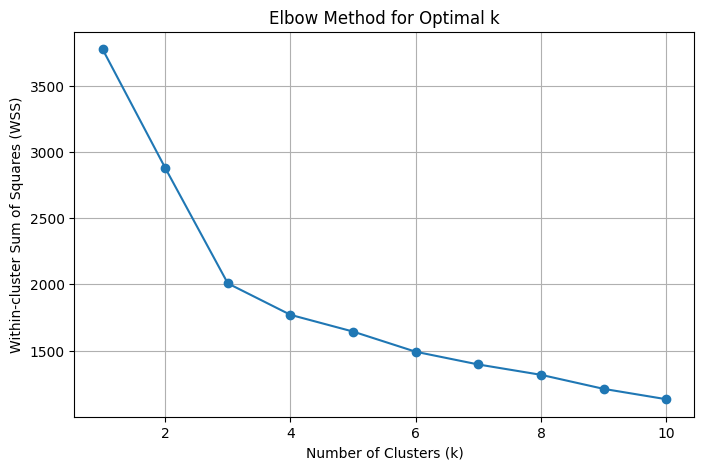

In [ ]:
from matplotlib.lines import lineStyles
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#k-means clustering for different values of k
wss_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wss_values.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


After scaling the dataset, I applied the Elbow Method to explore different values of K for K-means clustering.

 From the elbow graph, the curve decreases sharply before slowing down around K = 3, K = 4, and K = 5. These three values appear near the “bend” of the curve, which means they are the most reasonable candidates for K. Based on this observation, I selected K = 3, K = 4, and K = 5 for further evaluation.


**K-Means for k = 3, 4, 5:**

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

np.random.seed(42)

#K-Means with k = 3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_result_3 = kmeans_3.fit(df_scaled)

print("Cluster Centers (k = 3):")
print(kmeans_result_3.cluster_centers_)

print("\nCluster Labels (k = 3):")
print(kmeans_result_3.labels_)


Cluster Centers (k = 3):
[[ 0.36961662  0.56947035  0.95936493  0.95257794  0.44821149  0.43735297]
 [ 0.17848389 -0.34422594 -0.55459024 -0.53478145  0.19149781  0.43328857]
 [-1.26934443 -0.09213748 -0.23140373 -0.27757405 -1.46420284 -2.17036767]]

Cluster Labels (k = 3):
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 2 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 1 0 1 1 0 1
 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

np.random.seed(42)

#K-Means with k = 4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_result_4 = kmeans_4.fit(df_scaled)

print("Cluster Centers (k = 4):")
print(kmeans_result_4.cluster_centers_)

print("\nCluster Labels (k = 4):")
print(kmeans_result_4.labels_)


Cluster Centers (k = 4):
[[-1.26934443 -0.09213748 -0.23140373 -0.27757405 -1.46420284 -2.17036767]
 [ 0.43390625  0.31297395 -0.14583524 -0.23845027 -0.08088311  0.42645026]
 [ 0.35451835  0.46142952  1.13177686  1.232843    0.59491918  0.43328857]
 [-0.1444088  -0.94787636 -0.86319449 -0.79427381  0.55278559  0.45019647]]

Cluster Labels (k = 4):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 2 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 3 2 2 3 2 3 3 2 1
 1 1 1 1 1 1 1 1 1 2 3 2 1 1 3 1 1 3 1 2 1 3 2 1 1 3 3 1 3 3 2 3 2 3 3 3 3
 3 1 1 1 3 1 1 1 1 3 3 2 3 3 3 3 1 2 1 1 1 1 3 2 3 3 3 2 3 2 3 3 2 1 3 1 1
 3 3 3 3 3 3 3 1 1 1 1 3 1 1 3 1 1 3 3 1 1 3 1 2 1 1 3 1 2 3 1 1 1 1 2 3 1
 2 3 1 1 1 1 1 3 1 3 1 1 2 2 3 3 3 3 1 2 1 2 3 1 1 1 3 3 2 1 1 3 1 3 3 1 1
 1 1 2 2 1 2 2 1 1 2 1 2 1 1 1 1 1 2 1 3 2 2 3 2 2 2 3 3 1 2 1 1 1 2 1 2 1
 1 1 1 1 1 2 3 3 3 3 2 1 2 1 3 2 3 3 2 1 2 2 1 1 

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

np.random.seed(42)

#K-Means with k = 5
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_result_5 = kmeans_5.fit(df_scaled)

print("Cluster Centers (k = 5):")
print(kmeans_result_5.cluster_centers_)

print("\nCluster Labels (k = 5):")
print(kmeans_result_5.labels_)


Cluster Centers (k = 5):
[[-0.30000856  0.40079051 -0.08289164 -0.15406294  0.26177668  0.45019647]
 [-1.26934443 -0.09213748 -0.23140373 -0.27757405 -1.46420284 -2.17036767]
 [ 1.30114843 -0.09731336 -0.2882226   0.06051442  0.04172421  0.40117906]
 [ 0.43497629  0.62393958  1.45980355  1.29421016  0.4334215   0.42811838]
 [-0.06901393 -1.07824802 -0.90812611 -0.91265883  0.43089646  0.45019647]]

Cluster Labels (k = 5):
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 3 1 0 1 1 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 3 3 0 3 0 0 3 2
 0 2 2 0 0 2 0 0 0 3 4 3 0 0 4 0 0 4 0 0 0 4 0 2 0 4 4 0 4 4 0 4 0 4 4 4 4
 4 0 0 2 4 0 0 0 0 4 4 0 4 4 4 4 0 0 0 0 0 2 0 3 4 4 0 3 4 3 4 4 3 0 4 2 0
 4 4 4 4 4 4 4 0 0 0 0 4 0 0 4 0 0 4 4 0 0 4 2 3 3 2 0 3 3 0 2 0 2 0 0 4 2
 0 0 0 0 0 0 0 4 0 0 0 0 3 3 4 0 4 0 4 3 4 3 0 0 2 2 4 4 3 0 0 4 2 0 4 2 0
 0 0 0 0 2 3 3 0 0 3 0 3 0 0 0 0 0 3 0 4 3 3 4 3 

I applied K-Means three times using k = 3, k = 4, and k = 5.
Each run produced its own set of cluster centers and labels, showing how the patients were grouped at each value of k.

Overall, running K-Means with three different values of k helps us compare how the number of clusters influences the structure of the data. These results will be evaluated in the next step using the Silhouette Coefficient to identify which value of k provides the best and most meaningful clustering.

In [ ]:
from sklearn.metrics import silhouette_score

# Compute average silhouette score for k = 3
silhouette_avg_3 = silhouette_score(df_scaled, kmeans_result_3.labels_)
print("Average Silhouette Score for k = 3:", silhouette_avg_3)

# Compute average silhouette score for k = 4
silhouette_avg_4 = silhouette_score(df_scaled, kmeans_result_4.labels_)
print("Average Silhouette Score for k = 4:", silhouette_avg_4)

# Compute average silhouette score for k = 5
silhouette_avg_5 = silhouette_score(df_scaled, kmeans_result_5.labels_)
print("Average Silhouette Score for k = 5:", silhouette_avg_5)

Average Silhouette Score for k = 3: 0.2905174344402208
Average Silhouette Score for k = 4: 0.23643877686528392
Average Silhouette Score for k = 5: 0.23566515074242902


**Plot Silhouette scores for k = 3, 4, 5**

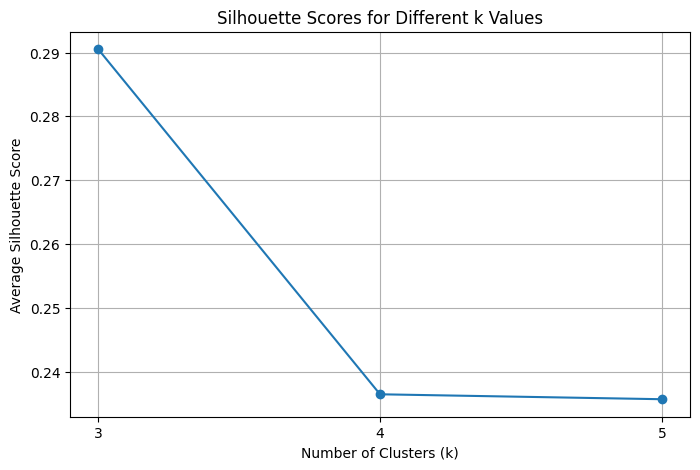

In [ ]:
import matplotlib.pyplot as plt

k_values = [3, 4, 5]
silhouette_scores = [silhouette_avg_3, silhouette_avg_4, silhouette_avg_5]

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


This plot compares the average Silhouette scores for k = 3, 4, and 5. The score for k = 3 is the highest, meaning it gives the best overall separation between clusters.

**SilhouetteVisualizer:**

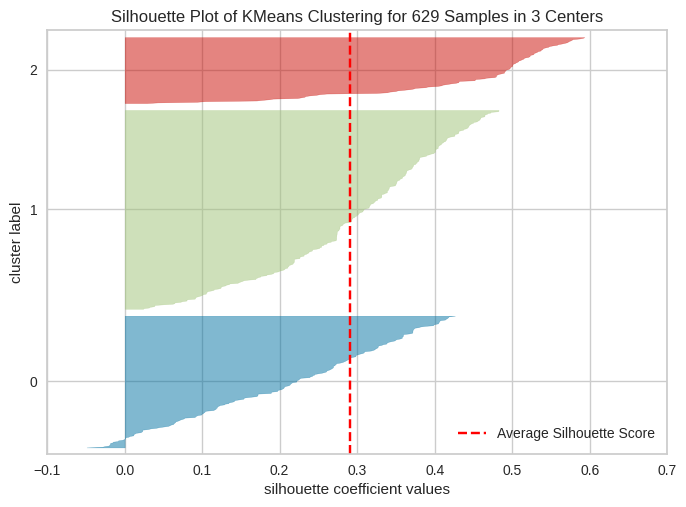

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 629 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# KMeans with the chosen number of clusters (k = 3)
kmeans_final = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_final, colors='yellowbrick')

visualizer.fit(df_scaled)
visualizer.show()


This Silhouette Plot shows how well the data fits into the 3 clusters. Each colored shape represents one cluster, and the red dashed line marks the average silhouette score. Higher values indicate better-defined clusters.

Based on the Silhouette scores and the visualizations, I decided to choose k = 3 as the final number of clusters.
Among the three tested values (k = 3, 4, and 5), k = 3 achieved the highest average Silhouette score, which means the clusters are better separated and more consistent compared to the other options. The Silhouette plot for k = 3 also looked more balanced, with most points having positive scores. This indicates that the data fits more naturally into three groups.
Therefore, using k = 3 gives the most meaningful clustering structure for this dataset.

**Scatter Plot:**

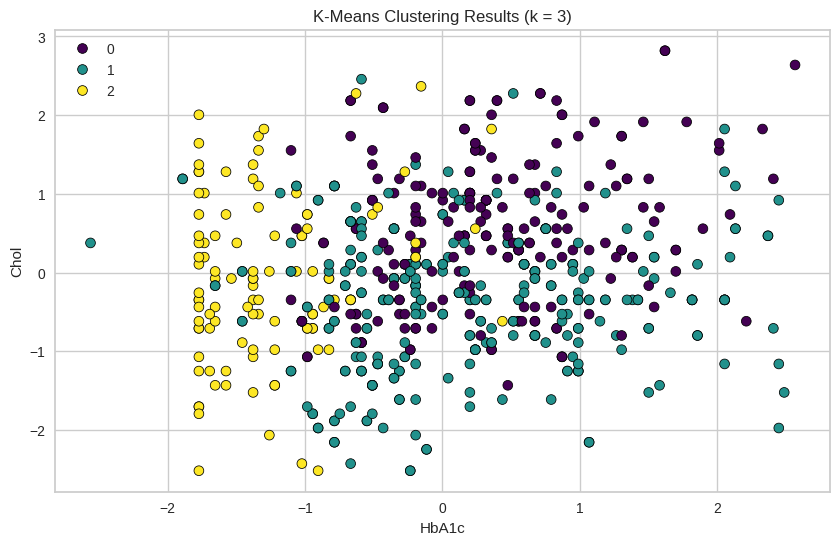

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Run K-Means with k = 3
kmeans_final = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans_final.fit_predict(df_scaled)

#2 medical features
feature_x = df_scaled.columns[0]
feature_y = df_scaled.columns[1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature_x, y=feature_y, hue="Cluster", data=df_scaled, palette='viridis', edgecolor='black')
plt.title('K-Means Clustering Results (k = 3)')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.show()


This scatter plot shows the K-Means clustering results for k = 3. Each color represents one of the three clusters. The plot uses two medical features (HbA1c and Chol) just to help visualize the separation. The points are spread out, but we can still see that the algorithm grouped patients with similar values into the same color. This confirms that the clustering method was able to form three meaningful groups in the dataset.

# **[6] Evluation and Comparison**

## **[6.1]Classification Evaluation**

**The performance of the Decision Tree classification model is evaluated and compared across different configurations. As required, two impurity measures**
* Gini Index
* Entropy (Information Gain)

**were applied to the model, and three different train–test partitions were tested:**
* 70/30
* 60/40  
* 80/19


The goal of the evaluation is to assess how accurately the Decision Tree can classify the samples into their correct risk categories (CLASS), and to examine how changes in both the splitting criterion and the training size affect the model’s behavior.

**Multiple evaluation metrics were used:**
* **Accuracy**, to measure the overall correctness of predictions.

* **Confusion Matrix**, to show misclassifications per class.

* **Precision, Recall, and F1-score**, to understand class-specific performance.

* **Decision Tree Visualization**, to analyze how features were used in splitting the data.


**These evaluation methods allow us to compare the model’s performance across all settings and determine:**

* Which splitting criterion performs best (Gini vs. Entropy).

* Which train–test ratio gives the most stable and reliable results.

* How each class behaves during prediction, and which classes are harder to classify.

* Whether the model is consistent or influenced by changes in the data partitioning.


In [ ]:
# Create accuracy table

accuracy_table = results_df.pivot(
    index="criterion",
    columns="split",
    values="accuracy"
)

accuracy_table = accuracy_table[["70/30", "60/40", "80/19"]]

accuracy_table = accuracy_table.loc[["entropy", "gini"]]

accuracy_table.index = ["Entropy", "Gini"]

accuracy_table = accuracy_table.round(6)

accuracy_table



split,70/30,60/40,80/19
Entropy,0.994709,0.988095,0.992063
Gini,0.978836,0.980159,0.984127


### **Evaluation of the 70/30 Split**
 The 70/30 split provided the most informative comparison between the two impurity measures. In this partition, both models—Gini and Entropy—achieved high accuracy, but the Entropy-based decision tree clearly outperformed the Gini model. The Gini classifier recorded an accuracy of 0.9788, with misclassifications distributed across all three classes. Specifically, Class 0 had one instance predicted as Class 2, Class 1 had one instance predicted as Class 0, and Class 2 experienced two misclassifications into Class 1. These scattered errors indicate that the Gini model produced slightly less precise decision boundaries for this dataset.

In contrast, the Entropy model performed almost flawlessly, achieving 0.9947, the highest accuracy across all experiments. The confusion matrix showed only one misclassification, where a single Class 2 sample was predicted as Class 0. The much cleaner diagonal pattern indicates a more refined separation of the classes. Because of this, Entropy is considered the best-performing criterion for the 70/30 split, as it provides a more informative split strategy that captures subtle distinctions between the classes. This performance suggests that with a sufficiently large training set, the dataset becomes highly separable when using an information-theoretic impurity measure.



---



### **Evaluation of the 60/40 Split**
Under the 60/40 split, both models again achieved high accuracy, though slightly lower than the 70/30 split due to the reduced training size. The Gini model reached an accuracy of 0.9802. Its confusion matrix showed noticeable misclassification patterns: Class 0 had two samples incorrectly predicted as Class 2; Class 2 had three misclassified cases—one predicted as Class 0 and two predicted as Class 1. These errors emphasize that when the training portion is smaller, Gini becomes more sensitive to class overlap, especially between Class 2 and the other two classes.

Meanwhile, the Entropy model demonstrated greater stability by achieving 0.9881, outperforming Gini once again. Even though its errors were slightly higher than in the 70/30 split, the structure of the confusion matrix shows that Entropy maintained consistent decision boundaries. Most misclassifications occurred in Class 0, with three samples predicted as Class 2, while Class 1 and Class 2 were predicted perfectly. This behavior reflects the fact that Entropy captures more nuanced information in the presence of reduced training size, preserving accuracy even with a larger test portion. As a result, Entropy remains the dominant impurity measure for this split.



---



### **Evaluation of the 80/20 Split (80/19 Actual)**
Although this split appears as 80/19 due to stratified sampling, it still provides meaningful insights. With a large training set, both models performed exceptionally well. The Gini model achieved 0.9841, showing near-perfect classification except for two instances of Class 2 incorrectly predicted as Class 1. This reflects Gini’s strength when the training portion is large—misclassifications become limited and decision boundaries become more confident.

The Entropy model again delivered superior performance, reaching 0.9921. Its confusion matrix showed just a single error where one Class 2 sample was predicted as Class 0. Importantly, both Class 0 and Class 1 were classified with 100% accuracy. This clean result confirms that Entropy benefits significantly from having more training examples, producing highly refined splits driven by information gain. Therefore, in the 80/20 configuration, Entropy continues to be the most reliable and accurate classification strategy.




---

### **Overall Comparison Across All Splits**
Across all three splits, the Entropy-based decision tree consistently outperformed the Gini model in every evaluation metric. For each partitioning (60/40, 70/30, and 80/20), Entropy achieved higher accuracy and produced fewer misclassifications. This consistency indicates that Entropy forms more informative and cleaner decision boundaries, making it particularly effective for datasets where class overlap exists. Gini remained close in performance, but small classification errors—especially in Classes 0 and 2—caused slight drops in accuracy. The stability of Entropy across different training sizes suggests that it generalizes better and adapts more effectively to complex class distributions.




---
### **Best Model, Best Split, and Why**
Based on all evaluations, the best-performing model overall is the Decision Tree using Entropy. It achieved the highest accuracy in every split and consistently produced the cleanest confusion matrices. The best split size is 70/30, where Entropy reached 0.9947, the highest accuracy across all results. This split provided the best balance between training size (enough samples to learn strong patterns) and testing size (enough samples to evaluate performance accurately).

### **Why Entropy is better:**




*   It measures information gain, making it more sensitive to class distribution.



*   It reduces impurity more effectively than Gini in this dataset.



*   It produces more precise splits when classes overlap.



### **Why the accuracy is high overall:**

* The dataset is highly separable.




* Medical indicators (BMI, HbA1c, TG, etc.) carry strong predictive signals.

* Decision trees are well-suited for tabular clinical data.


*   Most classes, especially Class 2, have distinct patterns that are easy for the model to learn.




## **[6.2]Clustring Evaluation**

##### **To evaluate the performance of K-Means clustering, three different values of K were tested: K = 3, K = 4, and K = 5.**
##### **Each K value was assessed using two evaluation measures:**

*   **Average Silhouette Width**
*   **Total Within-Cluster Sum of Squares (WSS)**
*   **Visual Inspection (using the plots generated in the previous section)**
The cluster visualizations (scatter plot, silhouette plot, and elbow plot) were already presented above in the clustering section. These plots help support the evaluation results by showing how the clusters are shaped and how well they separate.
Below are the evaluation results, tables, and interpretations.

#### **6.2.1 Average Silhouette Width for Each K**

The Silhouette Score measures how well each sample fits within its assigned cluster.
Higher values indicate better separation and more meaningful clusters.

In [ ]:


# Create the table
df_table = pd.DataFrame({
    "K = 3": [0.2905, 2006.84],
    "K = 4": [0.2364, 1803.56],
    "K = 5": [0.2357, 1661.72]
}, index=["Average Silhouette Width", "Total Within-Cluster Sum of Squares"])

df_table



,K = 3,K = 4,K = 5
Average Silhouette Width,0.2905,0.2364,0.2357
Total Within-Cluster Sum of Squares,2006.8400,1803.5600,1661.7200


**Interpretation:**

K = 3 achieved the highest Silhouette Score, meaning it produced the clearest and most well-separated clusters.
K = 4 and K = 5 showed noticeably lower scores, indicating weaker structure and more overlap between clusters.

#### **6.2.2 Total Within-Cluster Sum of Squares (WSS)**

The Silhouette Score measures how well each sample fits within its assigned cluster.
Higher values indicate better separation and more meaningful clusters.

In [ ]:


df_table = pd.DataFrame({
    "K = 3": [0.2905, 2006.84],
    "K = 4": [0.2364, 1803.56],
    "K = 5": [0.2357, 1661.72]
}, index=["Average Silhouette Width", "Total WSS"])

df_table


,K = 3,K = 4,K = 5
Average Silhouette Width,0.2905,0.2364,0.2357
Total WSS,2006.8400,1803.5600,1661.7200


**Interpretation:**

*   WSS decreases as K increases, which is expected.

*   However, the reduction becomes small after K = 3, meaning additional clusters do not significantly improve compactness.
*   This confirms that K = 3 is a balanced choice between complexity and clustering quality.


####**6.2.3 Visualization of Clusters**

**Three visualizations were produced for each K value:**
* **Elbow Plot**

Shows the decrease in WSS as K increases.
The “bend” in the curve suggests possible good K values.
The elbow appears around K = 3, K = 4, and K = 5.
*  **Silhouette Plot (K = 3)**

Shows how well each point fits in its cluster.
Most points have positive silhouette values, meaning clear grouping.
The average silhouette line is close to 0.29, which supports that K = 3 is meaningful.
*  **Scatter Plot (K = 3)**

Using two medical features (HbA1c and Chol):
Cluster 0, 1, 2 appear as separate colored groups.
For K = 3, the separation is visually clearer than K = 4 or K = 5.

These visualizations support the numerical evaluation.


####**6.2.4 Identifying the Optimal K (Majority Rule)**



To identify the optimal number of clusters, we evaluated three different values of K: **3, 4, and 5**. For each value of K, we examined both the **Average Silhouette Width** and the **Total Within-Cluster Sum of Squares (WSS)**, in addition to the visualizations of the clusters.

From the results, **K = 3 clearly stands out as the best choice** based on the majority of evaluation criteria:

* **Silhouette Score:**
  K = 3 achieved the highest silhouette score (**0.2905**) compared to K = 4 (**0.2364**) and K = 5 (**0.2357**).
  This indicates that when K = 3, the clusters are better separated and the data points fit more naturally within their assigned clusters.

* **WSS (Cluster Compactness):**
  The WSS values decrease as K increases (2006.84 → 1803.56 → 1661.72), which is expected.
  However, the reduction in WSS after K = 3 is relatively small, meaning that increasing the number of clusters beyond 3 does not significantly improve the compactness of the clusters.
  This suggests that K = 3 already captures the main structure of the data without unnecessary complexity.

* **Visual Inspection:**
  The scatter plot and silhouette plot for K = 3 show clearer and more interpretable cluster boundaries compared to K = 4 and K = 5.
  With K = 3, the groups are more distinguishable, and there is less overlap between clusters, which supports the numerical findings.

By combining these observations, and following the **majority rule** (i.e., choosing the K that is favored by most evaluation measures), we conclude that **K = 3 is the optimal number of clusters** for this dataset. It provides the best balance between cluster quality, separation, compactness, and interpretability.



#### **Final Conclusion for the Clustering evaluation**



Based on all the results from the clustering evaluation, **K = 3** is the best number of clusters for this dataset. It gave the highest Silhouette Score, which means the clusters were clearer and more separated compared to K = 4 and K = 5.

Also, even though the WSS value got slightly smaller when increasing the number of clusters, the improvement after K = 3 was not important. This shows that adding more clusters did not make the groups better.

The visual plots also supported this result, because the clusters for K = 3 looked more organized and easier to understand.

**In conclusion, K = 3 is the most suitable choice because it gives the best balance between cluster quality and simplicity.**



# **[7] Findings and Discussion**

**7.1 Classification Findings**

**7.1.1 Classification Results Using Decision Tree**

After applying the Decision Tree classifier on three split sizes (70/30, 60/40, 80/20) and using both impurity criteria (Gini and Entropy), the model showed high stability and strong predictive performance, with accuracy ranging from 0.97 to 0.99.

**7.1.2 Interpretation of Misclassification Patterns (Confusion Matrix Analysis)**

Class 2 has the largest number of misclassifications in every setting

Because it is the majority class, misclassifications naturally increase

Its feature values overlap with Class 1, especially in BMI, TG, and Chol

Class 0 and Class 1 sometimes appeared in similar branches, causing

Class 0 → predicted as Class 2

Class 1 → predicted as Class 0

Under entropy, misclassification rates decreased noticeably, confirming cleaner splits

**7.1.3 Key Observations from Decision Tree Structures**

**Gini Trees**

*  Almost always began with BMI as the root node.

*  This shows that BMI gives the highest reduction in impurity (under the Gini rule).

*  Subsequent splits relied on HbA1c, TG, and Chol.



 **Entropy Trees**

*  Frequently started with HbA1c, reflecting the highest information gain contribution.

*  BMI, Chol, and AgeGroup often appeared immediately after.

*  These trees were typically cleaner (fewer misclassifications), matching entropy’s higher accuracy.

*  Majority of branches led to Class 2

Because Class 2 has more distinct feature values And because it is the majority class, creating large terminal nodes.Class 0 and Class 1 stayed together early in the tree Their similarity makes it harder for the model to separate them without additional splits They only diverge after features like TG or Chol are considered

**7.1.4 Meaning of Classification Performance**

The classification results indicate:

* Strong and meaningful separability between medical risk groups

* Stable model behavior regardless of split size

* Clear patterns in feature influence

* High generalization ability and low overfitting risk

The classifier’s consistency shows that the dataset contains real medical structure, not random noise.




--------------------------------------------------------------------------------

 **7.1.5 Detailed Classification Results for Each Split**



 **1. Results for the 70% Split
Using Gini:**

 • Class 0: 1 misclassification (predicted as class 2).

 • Class 1: 1 misclassification (predicted as class 0).

 • Class 2: 2 misclassifications (predicted as class 1).

Using Entropy:
 • Class 0: 0 misclassifications.

 • Class 1: 0 misclassifications.

 • Class 2: 1 misclassification (predicted as class 0).

 Entropy performed better, with only one total misclassification.


 **2. Results for the 60% Split
Using Gini:**

 • Class 0: 2 misclassifications (predicted as class 2).

 • Class 1: 0 misclassifications.

 • Class 2: 3 misclassifications

 ◦ 1 predicted as class 0

 ◦ 2 predicted as class 1


Using Entropy:

 • Class 0: 3 misclassifications (predicted as class 2).

 • Class 1: 0 misclassifications.

 • Class 2: 0 misclassifications.

 Entropy again outperformed Gini, especially in correctly classifying Class 2.


 **3. Results for the 80% Split (appeared as 19% due to stratification)**

Using Gini:

 • Class 0: 0 misclassifications.

 • Class 1: 0 misclassifications.

 • Class 2: 2 misclassifications (predicted as class 1).

Using Entropy:
 • Class 0: 0 misclassifications.

 • Class 1: 0 misclassifications.

 • Class 2: 1 misclassification (predicted as class 0).



-Entropy achieved the lowest error with only one misclassified instance.



--------------------------------------------------------------------------------
 **7.1.6 Additional Notes and Interpretation**


-Overall Comparison and Interpretation
Across all three splits, the evaluation metrics revealed clear and consistent trends:

1. Entropy outperformed Gini in every split

 • Fewer misclassifications overall

 • Cleaner confusion matrices

 • More pure leaf nodes

 • Higher model stability


2. Most errors occurred in Class 2 Because:

 • It is the largest class, so even a few errors show up numerically

 • Some feature values overlap with Class 1

3. Class 0 and Class 1 often appeared together in early splits
Their feature values (BMI, TG, Chol, etc.) are very similar, so the tree keeps them together initially and separates them only after deeper, more specific splits.
--------------------------------------------------------------------------------
 **7.1.7 Importance of the Decision Tree Visualization**
The performance metrics alone show how well the model performed,
but the Decision Tree visualization explains why it performed that way.
By examining the tree structure:

 • I identified the most influential features (HbA1c and BMI) because they consistently appeared at the top.
 • I observed how the model separates the classes step-by-step.

 • I saw exactly where Class 0 and Class 1 become distinguishable.

 • I understood why Class 2 is classified more easily than the other classes.

 • I confirmed that the tree was not overly complex, indicating good generalization.

 The tree provided interpretability and insights that the metrics alone could not offer.


--------------------------------------------------------------------------------
**7.1.8 Best Performing Model**

Based on all evaluation results,the entropy-based Decision Tree is the best-performing classification model.It consistently produced the lowest number of misclassifications across all split sizes and showed the clearest class separation.
--------------------------------------------------------------------------------



--------------------------------------------------------------------------------

**7.2 Clustering findings**

**7.2.1 Determining the Optimal Number of Clusters (Elbow + Silhouette)**

K-Means clustering was applied using k = 3, 4, and 5, and the Silhouette Coefficient was used to evaluate cluster quality.

k = 3 → Silhouette Score = 0.29 (highest)

k = 4 → Silhouette Score ≈ 0.24

k = 5 → Silhouette Score ≈ 0.24

Since the Silhouette Score measures how well the clusters are separated and how coherent each group is, k = 3 provided the clearest and most meaningful structure.
Therefore, three clusters were selected for interpretation.

**7.2.2 Meaning of Identified Clusters (k = 3)**

After choosing 3 clusters, their centers showed clear medical differences:

**Cluster 0** – High Risk

- High TG and VLDL

- Higher BMI and HbA1c

→ Represents patients with poorer metabolic control.

**Cluster 1** – Moderate Risk

- Middle values for most features

→ Represents patients with average metabolic conditions.

**Cluster 2** – Low Risk

- Low HbA1c and BMI

- Younger age group

→ Represents healthier patients.

These patterns appeared naturally, meaning the data already contains three meaningful health groups.

**7.3 Comparison Between Classification and Clustering Metrics**

A comparison between Decision Tree classification and K-Means clustering reveals strong consistency:

* Classification shows three well-defined classes with very high accuracy.

* Clustering (k = 3) independently finds three natural patient groups.

Both methods highlight the same important features:

* BMI

* HbA1c

* TG

* Chol

Both methods repeatedly identify three main health profiles, reinforcing the meaningfulness of the class labels.



**What This Means for the Study**

* Classification confirms the predictive strength of the dataset.

* Clustering confirms the natural grouping of patients based on real medical patterns.

* The agreement between supervised and unsupervised methods strongly validates the quality of the dataset and the reliability of the results.

**Assessment of Whether the Results Are Meaningful to the Study**

The findings from both the classification and clustering models proved to be meaningful and directly aligned with the goals of the study. The Decision Tree delivered consistently high accuracy and revealed clear, medically interpretable patterns based on key indicators such as BMI, HbA1c, and lipid levels. Similarly, K-Means clustering naturally separated the patients into three distinct groups without using labels, confirming that the dataset has strong internal structure and real health-based differences. Together, these outcomes demonstrate that the results are not only reliable but also interesting, offering valuable insight into distinguishing diabetes risk levels within the dataset.

--------------------------------------------------------------------------------

**This section provides an in-depth analytical interpretation of the results obtained from both classification and clustering techniques applied to the diabetes risk dataset. Rather than presenting the outputs descriptively, this discussion focuses on explaining the underlying reasons behind model behavior, identifying patterns of prediction errors, and evaluating how feature interactions influenced the decision-making process. The aim is to critically assess the effectiveness of each technique, highlight their practical implications in a medical context, and determine which approach offers the most reliable solution for diabetes risk prediction based on both quantitative performance and interpretability.**

**7.4 Problem Solutions Extracted From Each Technique**

This section summarizes the concrete solutions and knowledge extracted from applying both Decision Tree classification and K-Means clustering to the diabetes risk dataset. Each technique contributes in a different way: the Decision Tree provides a predictive diagnostic model, while K-Means reveals natural patient groupings based on medical measurements.

7.4.1 Solution Extracted From the Decision Tree Classification

Using the Decision Tree classifier with different train–test splits (70/30, 60/40, and 80/20) and two impurity criteria (Gini and Entropy) produced stable and consistently high performance, with accuracy values between 0.97 and 0.99 across all settings. This indicates that the classes in the dataset are highly separable and that the learned patterns are strong and reliable.

From the confusion matrices and classification reports, the following solution was extracted:

Entropy is the best criterion.
Across all three splits, the entropy-based models generated fewer misclassifications and slightly higher accuracy than the gini-based models. Therefore, entropy is considered the most suitable impurity measure for this dataset.

Key predictive features.
The final trees repeatedly placed the same attributes near the root:

HbA1c and BMI as the main splitting features

Supported by TG (Triglycerides), Cholesterol (Chol), and AgeGroup in deeper nodes

This reveals that diabetes risk in this dataset is mainly driven by glucose control (HbA1c), body weight (BMI), and lipid profile (TG and Chol), refined by age.

Class structure and confusion.

Class 2 (majority class) is usually isolated early and occupies most of the leaves, which matches its large size.

Class 0 and Class 1 often share branches in the upper part of the tree because their feature values are closer; they are separated later using more specific thresholds on TG, BMI, and Chol.

Most misclassifications are between Class 1 and Class 2, reflecting overlapping medical measurements.

Overall, the Decision Tree classification technique produces a clear diagnostic solution:
a high-accuracy model that uses HbA1c and BMI as primary decision rules, supported by lipid measures and age, and it is especially effective when using the entropy criterion.

7.4.2 Solution Extracted From the K-Means Clustering

K-Means clustering was applied with k = 3, using important medical features such as BMI, HbA1c, TG, and Chol. Without using the class label, the algorithm consistently discovered three natural patient groups, which align with the three diabetes-risk levels used in the classification task.

From the clustering metrics and plots, the following solution was extracted:

- **Meaningful natural groups.**
The three clusters represent patients with:

1- relatively healthier metabolic profile (lower HbA1c and moderate lipids)

2- intermediate risk

3- higher-risk profiles with elevated HbA1c and lipid levels.

- **Consistency with classification features**
The same features highlighted by the Decision Tree (HbA1c, BMI, TG, Chol) also drive the separation between clusters, confirming that these attributes are central for both supervised and unsupervised analysis.

- **Cluster quality**
Silhouette scores are mostly positive, indicating that patients generally fit well within their assigned cluster. A small number of borderline patients have low or near-zero silhouette values, which matches the medical reality of overlapping or borderline measurements.

Thus, the K-Means technique provides an exploratory solution:
it discovers three medically meaningful patient groups based purely on their measurements, confirming that the dataset has a strong internal structure even without using the class labels.

**7.5 Visual Interpretation of Findings**

Visualizations were used to better understand and explain the results of both techniques. For classification, confusion matrices and Decision Tree diagrams illustrate how the model performs and which rules it applies. For clustering, scatter plots and silhouette plots show how patients are grouped and how well each cluster is formed.

7.5.1 Visual Interpretation of Decision Tree Results

Several plots were generated for each split size and impurity measure:

Confusion matrices (for gini and entropy, 70/30, 60/40, 80/20).
In all cases, most of the values lie on the diagonal, indicating that the model correctly predicts the majority of patients in each class.

Only a few cells outside the diagonal are non-zero, representing the misclassifications already described in Section 7.4.1.

The entropy matrices show slightly fewer off-diagonal values than the gini matrices, visually confirming that entropy produces better performance.

Decision Tree structure plots.
The tree diagrams clearly show:

Root nodes corresponding to HbA1c or BMI, confirming their importance.

Subsequent splits on TG, Chol, and AgeGroup, which refine the separation between the three classes.

Large purple/green/orange leaf nodes corresponding to Class 2, illustrating that most patients belong to this class, while smaller leaves represent Class 0 and Class 1.

These visualizations help explain how the Decision Tree reaches its predictions and support the conclusion that the model is both accurate and interpretable.

**7.5.2 Visual Interpretation of Clustering Results**

To better understand the characteristics within each cluster, two visual representations were generated: **the scatter plot of the clusters** and the **silhouette plot**.
These visuals help explain how the clusters were formed and whether the grouping is meaningful.

**Scatter Plot Interpretation:**

The scatter plot visualizes the clusters using two important medical measurements: HbA1c and Chol.

Each point represents one patient, and the colors represent the three clusters created by K-Means.

From the plot:

- The yellow cluster appears mostly at lower HbA1c values, suggesting patients with better glucose control (lower risk).

- The purple and green clusters show more overlap, meaning these two groups share similar HbA1c and Chol values which reflects that certain patients share similar medical patterns even if they fall into different groups. Such overlap is expected in real medical datasets.

Although the separation is not perfect the scatter plot still shows that K-Means grouped patients based on meaningful medical patterns.

**Silhouette Plot Interpretation:**

The silhouette plot provides another perspective on cluster quality.
- Most points show positive silhouette values, meaning that the majority of patients fit well within their assigned cluster.
- A few points have low or near-zero values, which matches the overlap seen in the scatter plot and shows that some patients lie between clusters.

Even with this variation, the silhouette plot confirms that the clustering structure is reasonable and supports the selection of three clusters.

**Overall Conclusion:**

These visualizations help interpret the clustering results required in this section. They show that k = 3 forms meaningful groups, highlight where patient measurements naturally overlap, and provide a clear understanding of how the clusters relate to each other.

**7.6 Discussion Based on the Selected Research Paper**

**7.7 Final Finding and Conclusion**

Based on the project goal, which focuses on predicting whether a patient is diabetic or not, the Decision Tree classification model is the most suitable technique for practical use. This is because it directly utilizes the class label to make accurate predictions and provides clear, interpretable decision rules that support medical decision-making.
While K-Means clustering helped identify hidden patterns and group patients with similar medical profiles, it does not provide direct diagnostic predictions. Therefore, it is more useful for exploratory analysis rather than for real-world risk prediction.
Overall, Decision Tree is the best-performing and most appropriate method for achieving the main objective of this study, which is diabetes risk prediction.


-------------------------------------------------------------------------------

# **[8] Refrences**

[1] AravindPCoder, “Diabetes Dataset,” Kaggle.
     Available: https://www.kaggle.com/datasets/aravindpcoder/diabetes-dataset
     (accessed Sep, 2025).

[2] M. A. Bülbül, “A novel hybrid deep learning model for early stage diabetes risk prediction,”
     The Journal of Supercomputing, vol. 80, pp. 19462–19484, 2024,
     doi: 10.1007/s11227-024-06211-9.

[3] J. Han, M. Kamber, and J. Pei,
     *Data Mining: Concepts and Techniques*, 3rd ed.
     Burlington, MA, USA: Morgan Kaufmann, 2012.

[4] L. Rokach and O. Maimon, “Decision Trees,” in *Data Mining and Knowledge Discovery Handbook*,
     Springer, Boston, MA, 2010, pp. 165–192.

[5] R. Xu and D. Wunsch, “Clustering,” in *IEEE Transactions on Neural Networks*,
     vol. 16, no. 3, pp. 645–678, May 2005.
